In [51]:
!gdown "1h8OhUcVpFyLSctqwSIz1axYosBMWqzcp"  #Sales.csv
!gdown "1Q3gj_Ee85lHAxf16p14R9A9y77cdOkro"  #Products.csv
!gdown "1fN1dJZU0thpEuj4LL8HryoyHO40TzA58"  #Customers.csv

Downloading...
From: https://drive.google.com/uc?id=1h8OhUcVpFyLSctqwSIz1axYosBMWqzcp
To: /content/Sales.csv
100% 2.80M/2.80M [00:00<00:00, 198MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Q3gj_Ee85lHAxf16p14R9A9y77cdOkro
To: /content/Products.csv
100% 305k/305k [00:00<00:00, 84.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fN1dJZU0thpEuj4LL8HryoyHO40TzA58
To: /content/Customers.csv
100% 1.43M/1.43M [00:00<00:00, 147MB/s]


In [52]:
# Import Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import math

# **1.Data Exploration and Cleaning:**


In [54]:
# Explore  Data
sales_df = pd.read_csv('Sales.csv')
sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [55]:
# Sales Dataset Info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [56]:
# Find null Values in sales data
sales_df.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [57]:
# Find Duplicates in sales data
sales_df.duplicated().sum()

0

In [108]:
products_df = pd.read_csv('Products.csv')
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [59]:
#Products Dataset Info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [60]:
#Find null values in products dataset
products_df.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [61]:
# Find duplicates in Products dataset
products_df.duplicated().sum()

0

In [62]:
customers_df = pd.read_csv('Customers.csv',encoding="unicode_escape")
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [63]:
# Customers dataset Info
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [64]:
# Find Null Values in Customers Dataset
customers_df.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [65]:
# Find Duplicates in customer dataset
customers_df.duplicated().sum()

0

In [66]:
# Addressing the null values columns in customer data

In [67]:
# Filter the null values in customer data
null_values = customers_df[customers_df.isnull().any(axis=1)]
null_values

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


The filtered rows indicate that there are null values present in the "state code" column for entries where the state is "Napoli". We need to fill these null values with the state code "NPI".

In [68]:
# Reconfirm null values are present only in the state "Napoli"
napoli = customers_df[customers_df['State'] == 'Napoli']
napoli

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [69]:
# Fill statecode column in state code column
customers_df['State Code'] = customers_df['State Code'].fillna('NPI')


In [70]:
customers_df.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

The customers and products data have been cleaned, and there are no duplicate rows present in either dataset.

We need to change the data type of the order date and delivery date columns in the sales data.


In [71]:
# Find the average time taken to delivery for each date
sales_df['Delivery Date'] = pd.to_datetime(sales_df['Delivery Date'])
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


There are 49,719 missing delivery dates in the sales data. We cannot fill these with the mean date or the most frequently occurring date. Instead, we need to find the average delivery time for each state and fill the missing values in the sales data accordingly.





In [72]:
# Merge sales data with customer data to get the state information
merged_df = sales_df.merge(customers_df, left_on='CustomerKey', right_on='CustomerKey', how='left')

# Calculate delivery time
merged_df['Delivery Time'] = (merged_df['Delivery Date'] - merged_df['Order Date']).dt.days

merged_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Delivery Time
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,NaN
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,11/20/1995,12.0
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,11/20/1995,12.0
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,11.0
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,11.0


In [78]:
# Calculate the average delivery time for each state
state_avg_delivery_time = merged_df.groupby('State')['Delivery Time'].mean().to_dict()
state_avg_delivery_time

{'Aberdeen': 4.125,
 'Aberdeenshire': 4.914285714285715,
 'Agrigento': nan,
 'Alabama': 4.492537313432836,
 'Alaska': 3.4722222222222223,
 'Alberta': 4.331730769230769,
 'Alessandria': 3.6842105263157894,
 'Allerdale': 2.0,
 'Alsace': 5.555555555555555,
 'Amber Valley': 3.0,
 'Ancona': 6.8,
 'Anglesey': 3.764705882352941,
 'Angus': 5.0,
 'Aosta': 2.5,
 'Aquitaine': 5.0,
 'Arezzo': 5.0,
 'Argyllshire': 4.613636363636363,
 'Arizona': 4.086956521739131,
 'Arkansas': 4.2,
 'Arun': 7.0,
 'Ascoli Piceno': 4.444444444444445,
 'Ashfield': nan,
 'Ashford': 4.0,
 'Asti': 5.0,
 'Australian Capital Territory': 3.857142857142857,
 'Auvergne': 9.0,
 'Avellino': 4.0,
 'Aylesbury Vale': 3.0,
 'Babergh': 4.666666666666667,
 'Baden-Württemberg': 3.971830985915493,
 'Bari': 3.0,
 'Barnet': nan,
 'Basse-Normandie': nan,
 'Bassetlaw': nan,
 'Bath and North East Somerset': nan,
 'Bedford': 1.0,
 'Belluno': 2.0,
 'Benevento': nan,
 'Bergamo': 4.875,
 'Berkshire': 4.0,
 'Berlin': 5.565217391304348,
 'Biella':

In [79]:
# Function to fill missing delivery dates based on state average delivery time
def fill_missing_delivery_date(row):
    if pd.isna(row['Delivery Date']) and not pd.isna(row['Order Date']):
        avg_days = state_avg_delivery_time.get(row['State'], None)  # Default to None if state is not found
        if avg_days is not None and not pd.isna(avg_days):
            avg_days_ceil = math.ceil(avg_days)  # Apply ceiling to the average delivery time
            return row['Order Date'] + pd.Timedelta(days=avg_days_ceil)
        else:
            return pd.NaT  # Fill with NaT (Not a Time) for pandas datetime if avg_days is NaN
    return row['Delivery Date']

# Apply the function to fill missing delivery dates
merged_df['Delivery Date'] = merged_df.apply(fill_missing_delivery_date, axis=1)

In [46]:
#check the null values in merged data
merged_df.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date      933
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
Gender               0
Name                 0
City                 0
State Code           0
State                0
Zip Code             0
Country              0
Continent            0
Birthday             0
Delivery Time    49719
dtype: int64

Some null values remain in the delivery date column because there is no historical delivery date data for those particular states.

In [47]:
# Fill the null values in sales data with average time taken gor delivery with respect to state
sales_df['Delivery Date'] = merged_df['Delivery Date']

In [48]:
sales_df.isnull().sum()

Order Number       0
Line Item          0
Order Date         0
Delivery Date    933
CustomerKey        0
StoreKey           0
ProductKey         0
Quantity           0
Currency Code      0
dtype: int64

In [50]:
#check the null values in sales data rows
null_values = merged_df[merged_df.isnull().any(axis=1)]
null_values

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Delivery Time
0,366000,1,2016-01-01,2016-01-06,265598,10,1304,1,CAD,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,NaN
6,366004,1,2016-01-01,2016-01-06,1107461,38,163,6,GBP,Male,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,11/28/1979,NaN
7,366004,2,2016-01-01,2016-01-06,1107461,38,1529,2,GBP,Male,Sam Nelson,BURSCOUGH BRIDGE,West Lancashire,West Lancashire,L40 8UX,United Kingdom,Europe,11/28/1979,NaN
8,366005,1,2016-01-01,2016-01-06,844003,33,421,4,EUR,Male,Ouassim Heuver,Leeuwarden,FR,Friesland,8916 CD,Netherlands,Europe,6/22/1995,NaN
9,366007,1,2016-01-01,2016-01-06,2035771,43,1617,1,USD,Female,Damiana Corona,Winchester,VA,Virginia,22601,United States,North America,10/30/1944,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62867,2243025,1,2021-02-20,2021-02-25,1909290,49,1128,2,USD,Male,Mijo Ivankovic,Laurel,MD,Maryland,20707,United States,North America,7/4/1955,NaN
62868,2243025,2,2021-02-20,2021-02-25,1909290,49,2511,2,USD,Male,Mijo Ivankovic,Laurel,MD,Maryland,20707,United States,North America,7/4/1955,NaN
62869,2243026,1,2021-02-20,2021-02-25,1737466,49,58,6,USD,Female,Christina Miller,Philadelphia,PA,Pennsylvania,19139,United States,North America,10/8/1957,NaN
62872,2243028,1,2021-02-20,2021-02-25,1728060,66,1584,3,USD,Male,Dorian Beahm,Cambridge,MA,Massachusetts,2141,United States,North America,12/1/1950,NaN


In [88]:
#delete the null values
sales_df = sales_df.dropna()

In [89]:
sales_df.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

We have now dropped the 933 rows with null delivery dates because there were no historical delivery records available for those states, making it impossible to derive meaningful insights.

**The above steps ensured that our datasets are now clean, with missing delivery dates either filled with meaningful estimates or removed if estimation was not possible. This enhances the quality and reliability of the dataset for further analysis**

-------------------------------------------------------------------------------------------------------------------------------------------------

**Customer Distribution in Data Visualization**

1. Gender Distribution:






*   Bar Chart: To compare the number of male and female customers.
*   Pie Chart: To show the proportion of male to female customers.


.

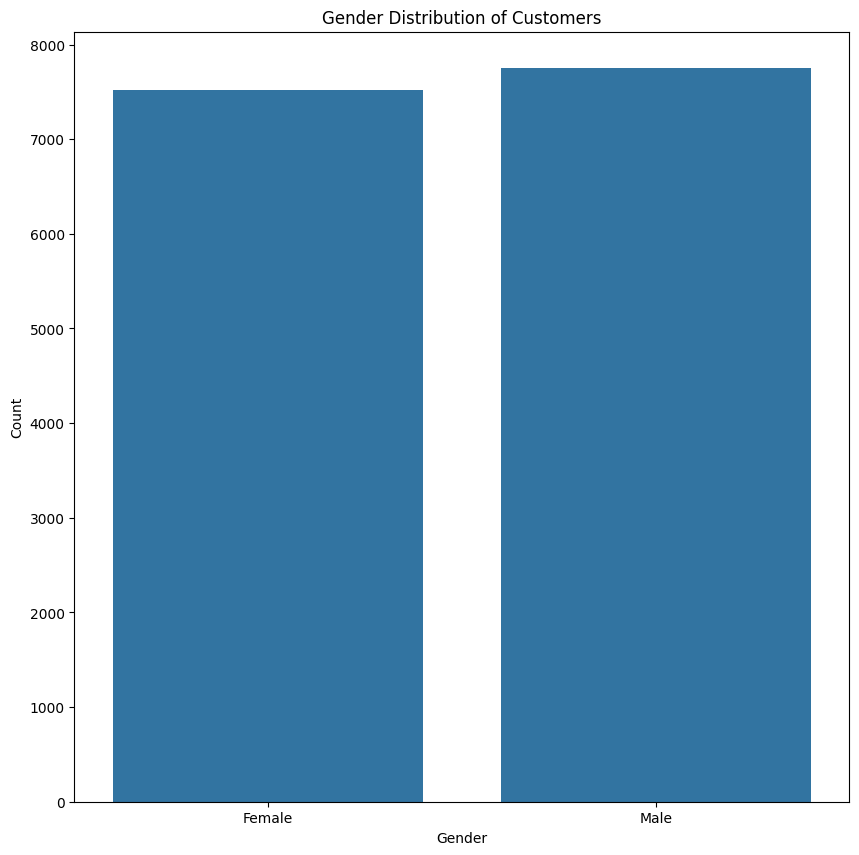

In [93]:
# Bar chart for gender distribution
plt.figure(figsize=(10, 10))
sns.countplot(x='Gender', data=customers_df)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



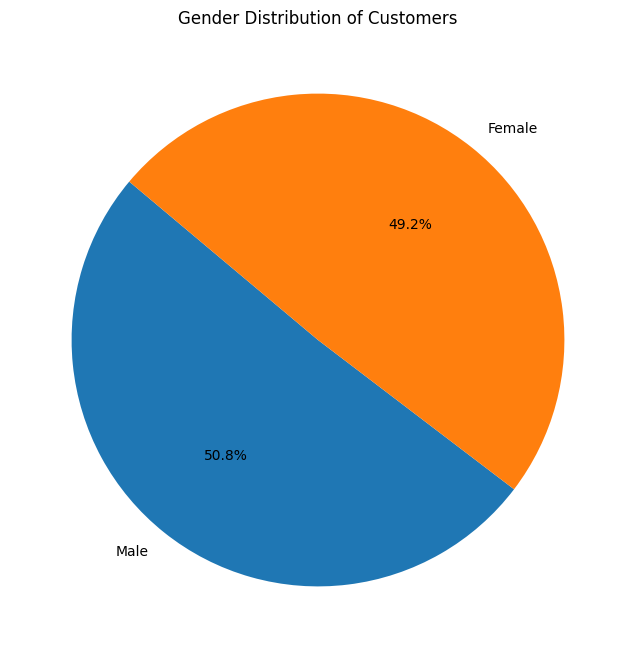

In [94]:
# Pie chart for gender distribution
gender_counts = customers_df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Customers')
plt.show()

The visualizations indicate that the distribution of male and female customers is nearly equal, with males representing 50.8% and females 49.2%.

2. Geographical Distribution:

*   Choropleth Map: To visualize the distribution of customers across different states or cities.
*   Bar Chart: To show the number of customers from different states or cities.
python







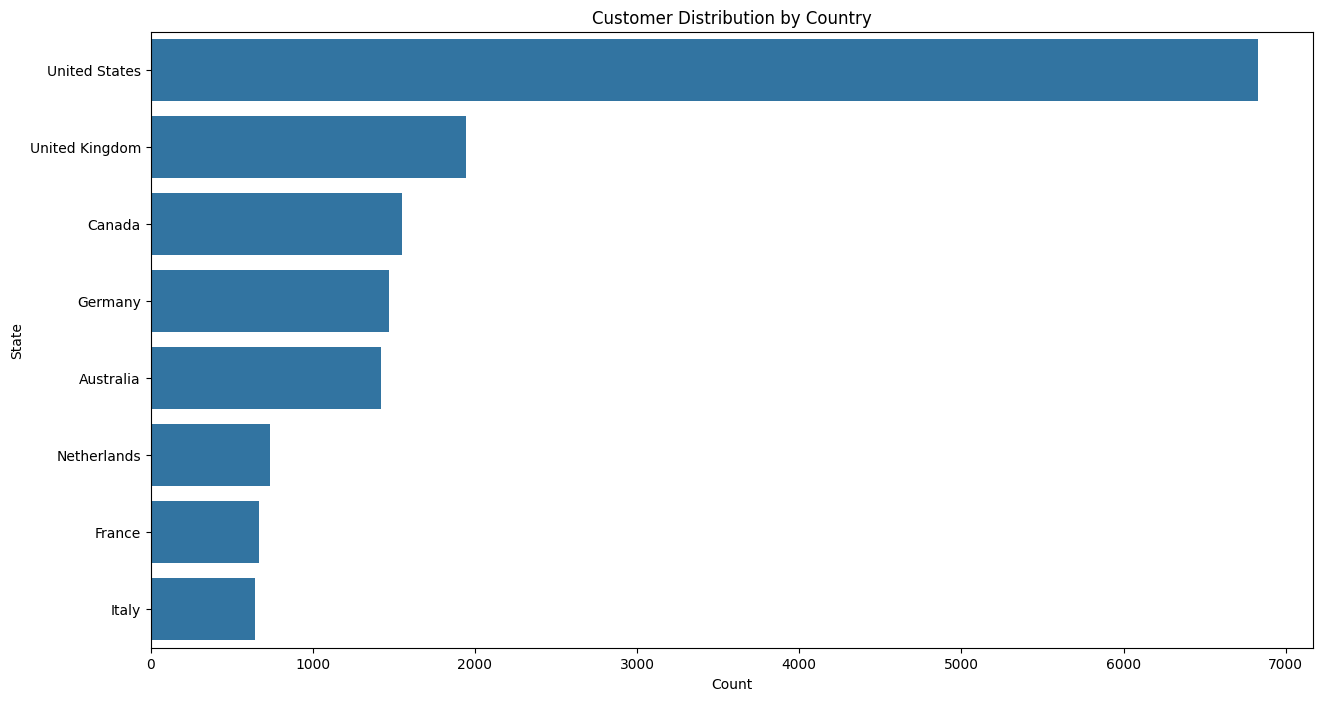

In [100]:
# Bar chart for geographical distribution
plt.figure(figsize=(15, 8))
sns.countplot(y='Country', data=customers_df, order=customers_df['Country'].value_counts().index)
plt.title('Customer Distribution by Country')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


3.Birthyear Distribution:


*   Histogram: To visualize the distribution of customer birthdays by year








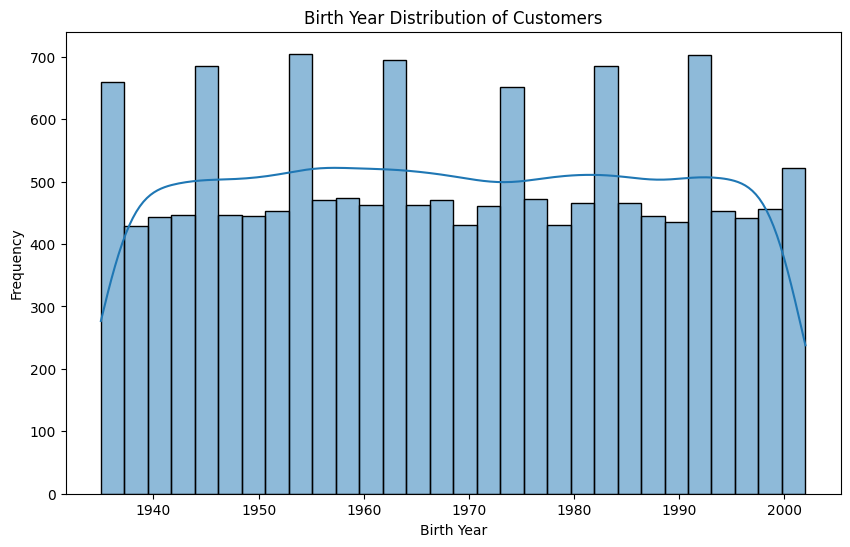

In [102]:
# Extract year from birthday
customers_df['Birthday'] = pd.to_datetime(customers_df['Birthday'])
customers_df['Birth Year'] = customers_df['Birthday'].dt.year

# Histogram for birth year distribution
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['Birth Year'], bins=30, kde=True)
plt.title('Birth Year Distribution of Customers')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()


4. Choropleth Map for Geographical Distribution

In [107]:
import plotly.express as px

# Choropleth map for geographical distribution worldwide
fig = px.choropleth(customers_df,
                    locations='Country',
                    locationmode='country names',
                    color='CustomerKey',
                    hover_name='Country',
                    title='Geographical Distribution of Customers Worldwide')
fig.show()


# **2. User Segmentation:**

In [139]:
# Join the three Dataset to get more insights and user segmentation
sales_customer_df = sales_df.merge(customers_df, on='CustomerKey', how='left')
full_df = sales_customer_df.merge(products_df, on='ProductKey', how='left')
full_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Birth Year,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,1995,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
1,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,1995,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
2,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,...,1962,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
3,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,...,1962,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
4,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,CAD,Female,...,1962,Contoso SLR Camera X143 Silver,Contoso,Silver,$214.03,$646.00,402,Digital SLR Cameras,4,Cameras and camcorders


In [140]:
full_df["Customer_Age"] = 2020 - full_df["Birth Year"]

In [141]:
# Remove dollar signs, commas, and extra spaces, and convert to numeric
full_df['Unit Price USD'] = full_df['Unit Price USD'].str.replace("$", "").str.replace(",", "").str.strip().astype(float)
full_df['Unit Cost USD'] = full_df['Unit Cost USD'].str.replace("$", "").str.replace(",", "").str.strip().astype(float)

In [142]:
# Add the 'Total Price' and 'Profit' columns and convert to integer
full_df['Total Price'] = (full_df['Quantity'] * full_df['Unit Price USD']).astype(int)
full_df['Profit'] = (full_df['Total Price'] - full_df['Unit Cost USD']).astype(int)

In [143]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13165 entries, 0 to 13164
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    13165 non-null  int64         
 1   Line Item       13165 non-null  int64         
 2   Order Date      13165 non-null  datetime64[ns]
 3   Delivery Date   13165 non-null  datetime64[ns]
 4   CustomerKey     13165 non-null  int64         
 5   StoreKey        13165 non-null  int64         
 6   ProductKey      13165 non-null  int64         
 7   Quantity        13165 non-null  int64         
 8   Currency Code   13165 non-null  object        
 9   Gender          13165 non-null  object        
 10  Name            13165 non-null  object        
 11  City            13165 non-null  object        
 12  State Code      13165 non-null  object        
 13  State           13165 non-null  object        
 14  Zip Code        13165 non-null  object        
 15  Co

In [154]:
# Define the required columns for customer segmentation
required_columns = ['Order Date',
    'CustomerKey', 'Gender', 'City', 'State Code', 'State', 'Zip Code', 'Country',
    'Continent', 'Customer_Age', 'Quantity', 'Total Price', 'Profit',
    'Product Name', 'Brand', 'Category', 'Subcategory', 'CategoryKey'
]

# Select the required columns
data_df = full_df[required_columns]

# Display the first few rows of the new DataFrame
data_df.head()


,Order Date,CustomerKey,Gender,City,State Code,State,Zip Code,Country,Continent,Customer_Age,Quantity,Total Price,Profit,Product Name,Brand,Category,Subcategory,CategoryKey
0,2016-01-01,1269051,Male,Auberry,CA,California,93602,United States,North America,25,2,854,712,A. Datum SLR Camera X136 Silver,A. Datum,Cameras and camcorders,Digital SLR Cameras,4
1,2016-01-01,1269051,Male,Auberry,CA,California,93602,United States,North America,25,1,665,444,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Home Appliances,Microwaves,8
2,2016-01-01,266019,Female,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,58,7,2254,2105,Contoso SLR Camera M146 Orange,Contoso,Cameras and camcorders,Digital SLR Cameras,4
3,2016-01-01,266019,Female,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,58,1,326,159,Adventure Works Laptop8.9 E0890 White,Adventure Works,Computers,Laptops,3
4,2016-01-01,266019,Female,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,58,4,2584,2369,Contoso SLR Camera X143 Silver,Contoso,Cameras and camcorders,Digital SLR Cameras,4


In [176]:
min_order_date = data_df['Order Date'].min()
max_order_date = data_df['Order Date'].max()
print("Minimum Order Date:", min_order_date)
print("Maximum Order Date:", max_order_date)

Minimum Order Date: 2016-01-01 00:00:00
Maximum Order Date: 2021-02-20 00:00:00


In [ ]:
data_df.value_counts()

**Based on the modified data, I recommend the following customer segmentation techniques. The data has been refined to ensure it is suitable for accurate and meaningful segmentation, which is crucial for drawing actionable insights and making informed business decisions:**

**Recommended Customer Segmentation Techniques**

**1. Demographic Segmentation:**

*   **Variables:** Gender,Country,Customer_Age.
*   **Why:** This helps in understanding the customer profile and tailoring marketing strategies to specific demographic groups.





**2. Behavioral Segmentation:**

*   **Variables:** Quantity, Total Price, Profit.
*   **Why:** Analyzing purchase behavior provides insights into buying patterns and preferences, enabling businesses to optimize product offerings and promotions.





**3. Product-Based Segmentation:**

.


*   **Variables:** Product Name, Brand, Category, Subcategory
*   **Why:** This identifies which products and brands are preferred by different customer segments, helping in targeted marketing and inventory management.


By employing these segmentation techniques on the refined data, businesses can effectively target and understand their customer base, leading to more personalized marketing strategies and improved business outcomes.


**Demographic Segments Influencing Profits and Purchases :**

**1.Gender Segmentation**


In [182]:
# Aggregate total purchases, profits, and number of customers by gender
gender_summary = data_df.groupby('Gender').agg({
    'Total Price': 'sum',
    'Profit': 'sum',
    'CustomerKey': 'nunique'  # Count the number of unique customers
}).rename(columns={'CustomerKey': 'Number of Customers'}).reset_index()
gender_summary

,Gender,Total Price,Profit,Number of Customers
0,Female,5541526,4796902,2237
1,Male,5857385,5088383,2310


<ipython-input-183-406420f375c1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




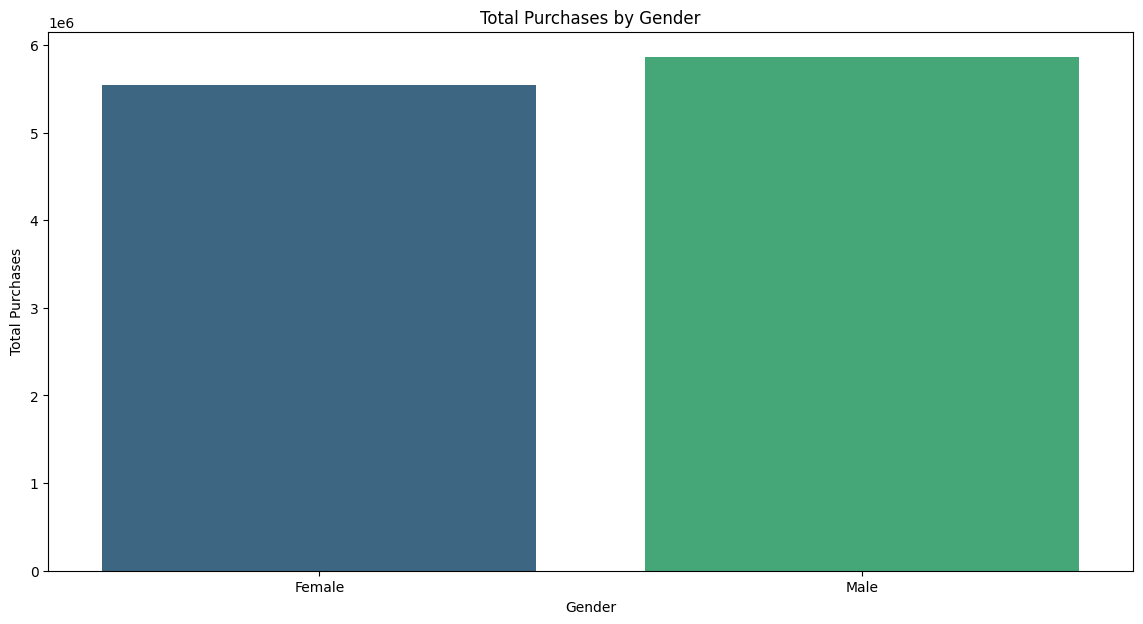

In [183]:
# Plot total purchases by gender
plt.figure(figsize=(14, 7))
sns.barplot(x='Gender', y='Total Price', data=gender_summary, palette='viridis')
plt.title('Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchases')
plt.show()

<ipython-input-184-bf05459cda89>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




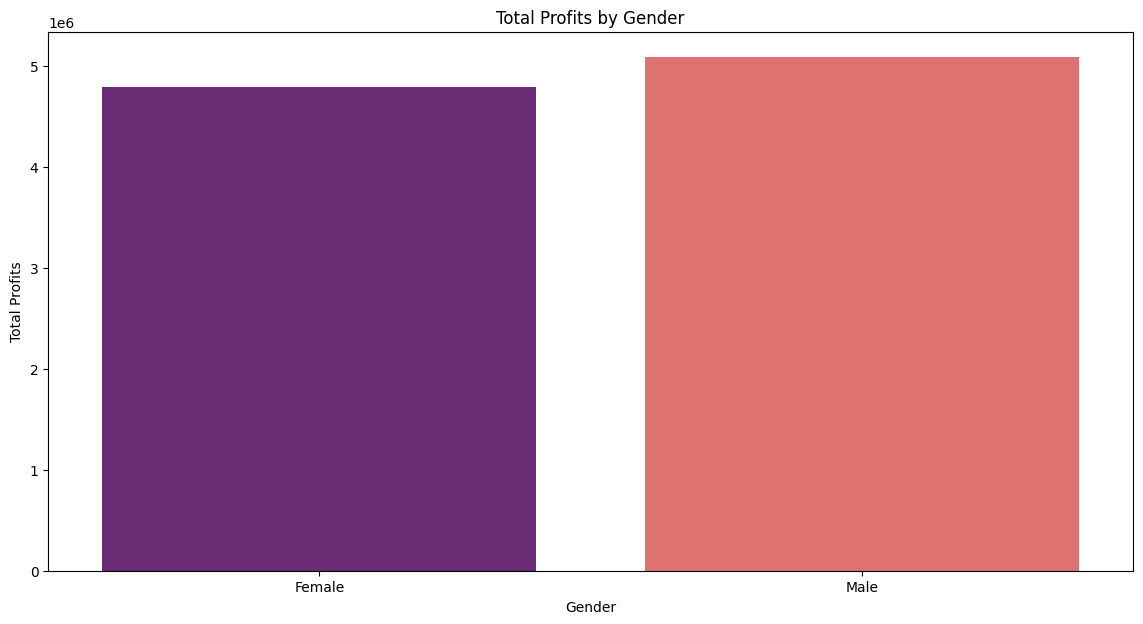

In [184]:
# Plot total profits by gender
plt.figure(figsize=(14, 7))
sns.barplot(x='Gender', y='Profit', data=gender_summary, palette='magma')
plt.title('Total Profits by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profits')
plt.show()

<ipython-input-185-4d5afc40b17d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




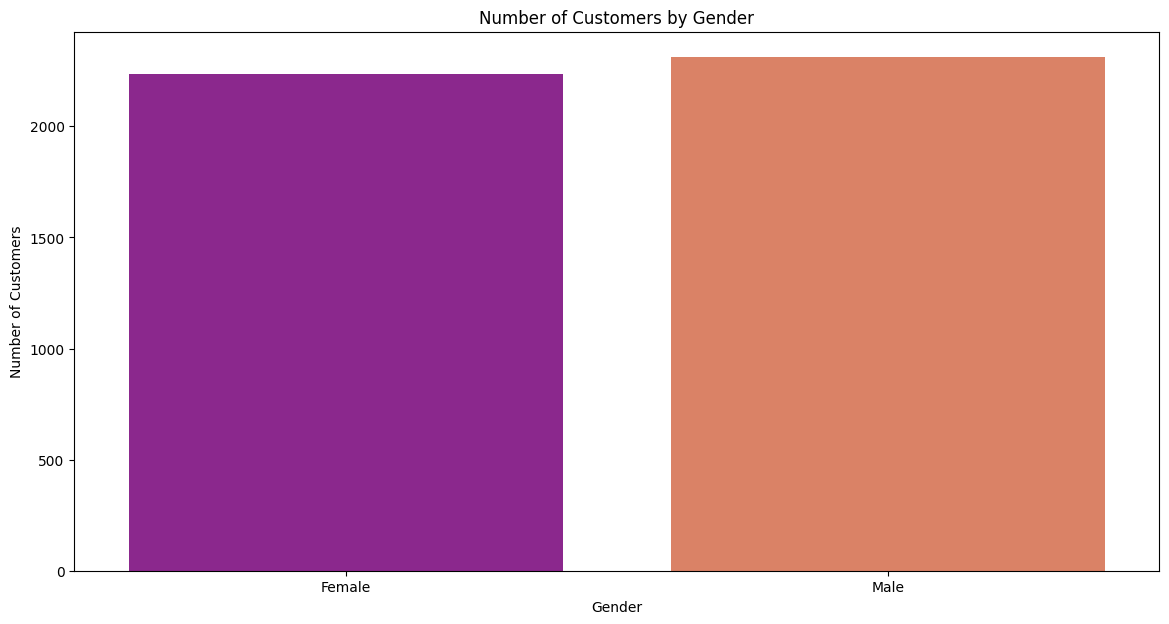

In [185]:
# Plot number of customers by gender
plt.figure(figsize=(14, 7))
sns.barplot(x='Gender', y='Number of Customers', data=gender_summary, palette='plasma')
plt.title('Number of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

**Detailed Analysis:**

 **1.Purchasing Behavior:**

*   Both genders exhibit similar purchasing behavior in terms of total spending, indicating that marketing and product offerings are appealing to both males and females.
*   Given the slight edge in total purchases and profits by males, there could be opportunities to further investigate the types of products that are slightly more favored by male customers.





**2.Profitability:**



*   The profitability is almost equally distributed between the genders, with males having a slight advantage.
*  The profitability is almost equally distributed between the genders, with males having a slight advantage.
*   This suggests that both male and female customers are equally valuable to the business, and any marketing efforts should continue to target both demographics effectively.









**3.Customer Base:**

*   The near-equal number of customers for each gender shows that the customer base is diverse and balanced.
*   This balance is a strength, indicating a broad appeal across genders and reducing the risk of relying too heavily on one demographic.






**2. Country Segmentation:**

In [186]:
# Aggregate total purchases, profits, and number of customers by country
country_summary = data_df.groupby('Country').agg({
    'Total Price': 'sum',
    'Profit': 'sum',
    'CustomerKey': 'nunique'  # Count the number of unique customers
}).rename(columns={'CustomerKey': 'Number of Customers'}).reset_index()
country_summary

,Country,Total Price,Profit,Number of Customers
0,Australia,608728,525612,258
1,Canada,1112290,968654,427
2,France,285640,246861,119
3,Germany,1167353,1019099,443
4,Italy,416362,358702,179
5,Netherlands,370623,322449,167
6,United Kingdom,1333712,1158182,545
7,United States,6104203,5285726,2409


<ipython-input-187-bf25d43127c0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




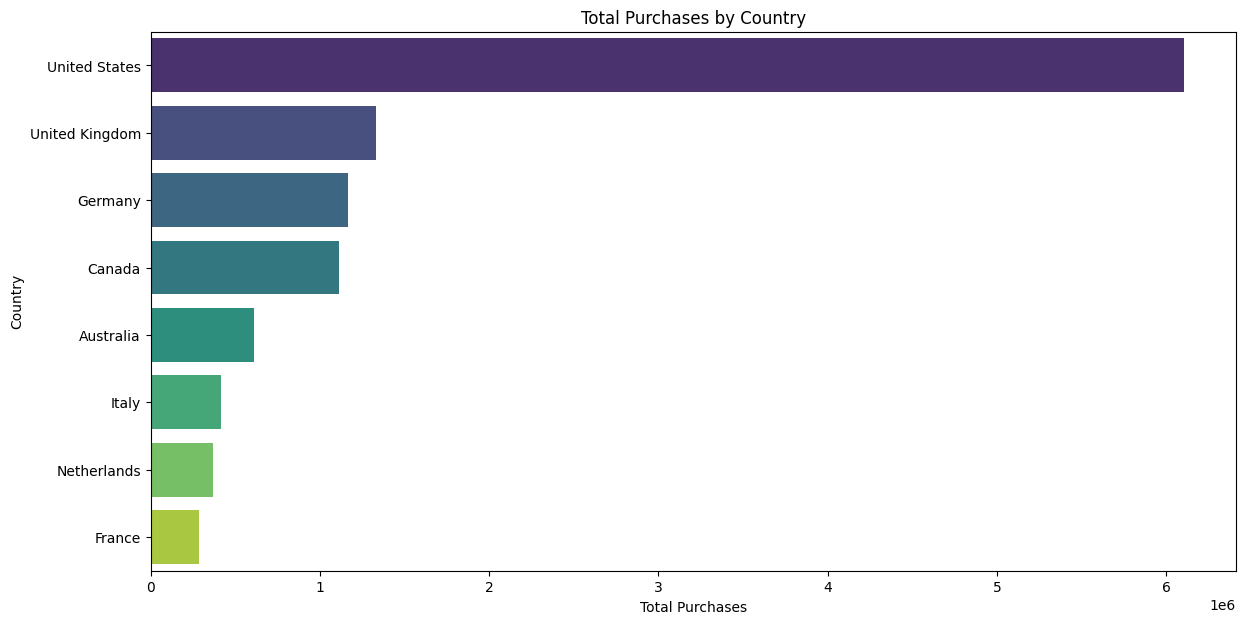

In [187]:
# Plot total purchases by country
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Price', y='Country', data=country_summary.sort_values('Total Price', ascending=False), palette='viridis')
plt.title('Total Purchases by Country')
plt.xlabel('Total Purchases')
plt.ylabel('Country')
plt.show()


<ipython-input-188-b7f4c5a6da2b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




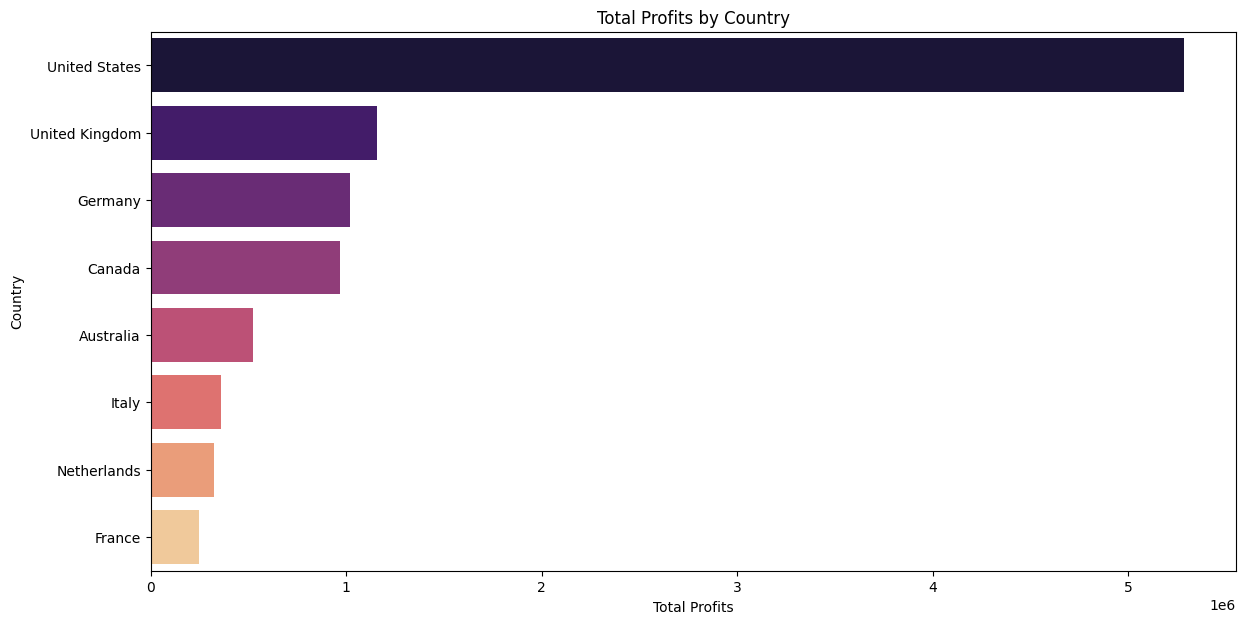

In [188]:
# Plot total profits by country
plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='Country', data=country_summary.sort_values('Profit', ascending=False), palette='magma')
plt.title('Total Profits by Country')
plt.xlabel('Total Profits')
plt.ylabel('Country')
plt.show()

**Detailed Analysis:**

**1.Market Dominance in the United States:**





* The significant lead suggests that the business has a strong brand presence and customer loyalty in the US.
Strong European Presence:

* The United Kingdom and Germany are strong markets in Europe, both in terms of revenue and customer base.
* These countries present significant opportunities for targeted marketing and product expansion to further capitalize on their strong performance.

**2.Emerging Markets:**

* Countries like Canada and Australia show potential with moderate contributions to total purchases and profits.
* Although they have fewer customers compared to the leading markets, they could be targeted for growth and increased market penetration.

**3.Underperforming Markets:**

* France, Italy, and the Netherlands contribute the least to both total purchases and profits.
* These markets may require a different strategy to boost performance, such as localized marketing campaigns, product adjustments to meet local preferences, or exploring why these markets are underperforming.

<ipython-input-189-22f802281e90>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




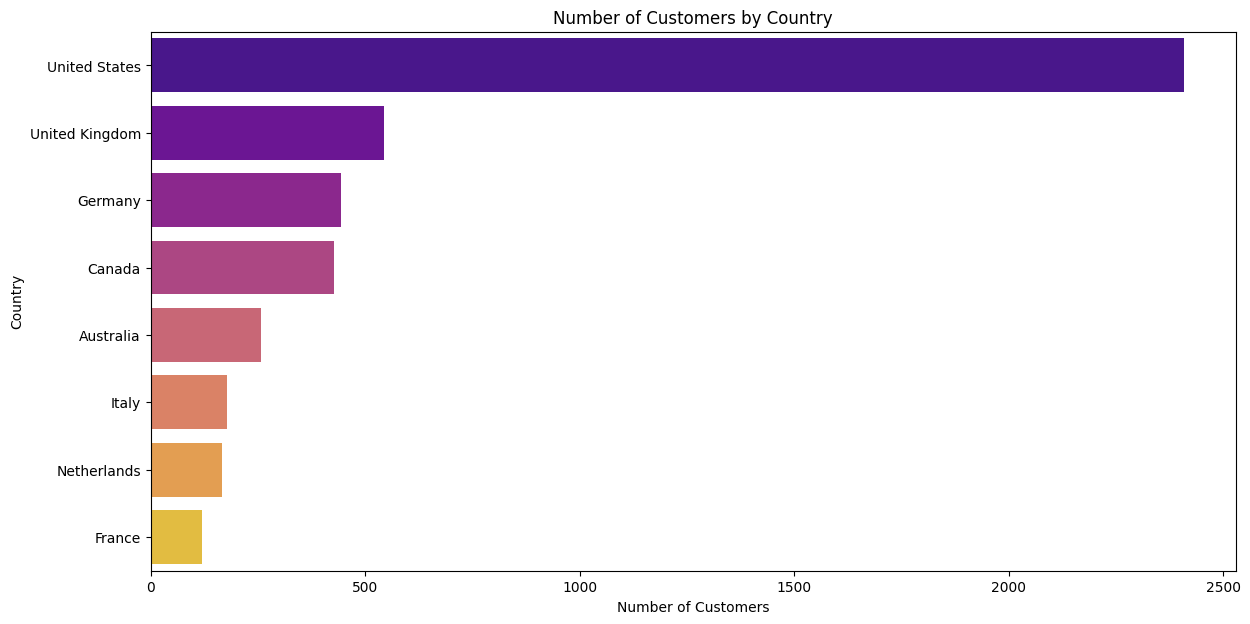

In [189]:
# Plot number of customers by country
plt.figure(figsize=(14, 7))
sns.barplot(x='Number of Customers', y='Country', data=country_summary.sort_values('Number of Customers', ascending=False), palette='plasma')
plt.title('Number of Customers by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

**3. Age segmentation**:

In [155]:
# Add Age Segments column based on customer age
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data_df['Age Segment'] = pd.cut(data_df['Customer_Age'], bins=bins, labels=labels)


<ipython-input-155-90606bad8274>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
data_df["Age Segment"].value_counts()

Age Segment
65+      3924
26-35    1955
56-65    1949
46-55    1932
36-45    1901
18-25    1500
0-17        4
Name: count, dtype: int64

In [180]:
# Aggregate total purchases and profits by age segment
age_segment_summary = data_df.groupby('Age Segment').agg({
    'Total Price': 'sum',
    'Profit': 'sum',
    'CustomerKey': 'count'  # Count the number of customers in each segment
}).rename(columns={'CustomerKey': 'Number of Customers'}).reset_index()
age_segment_summary

,Age Segment,Total Price,Profit,Number of Customers
0,0-17,313,234,4
1,18-25,1272394,1103549,1500
2,26-35,1738691,1509893,1955
3,36-45,1734812,1514986,1901
4,46-55,1549953,1329711,1932
5,56-65,1662386,1436032,1949
6,65+,3440362,2990880,3924


<ipython-input-195-e250df3f3347>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




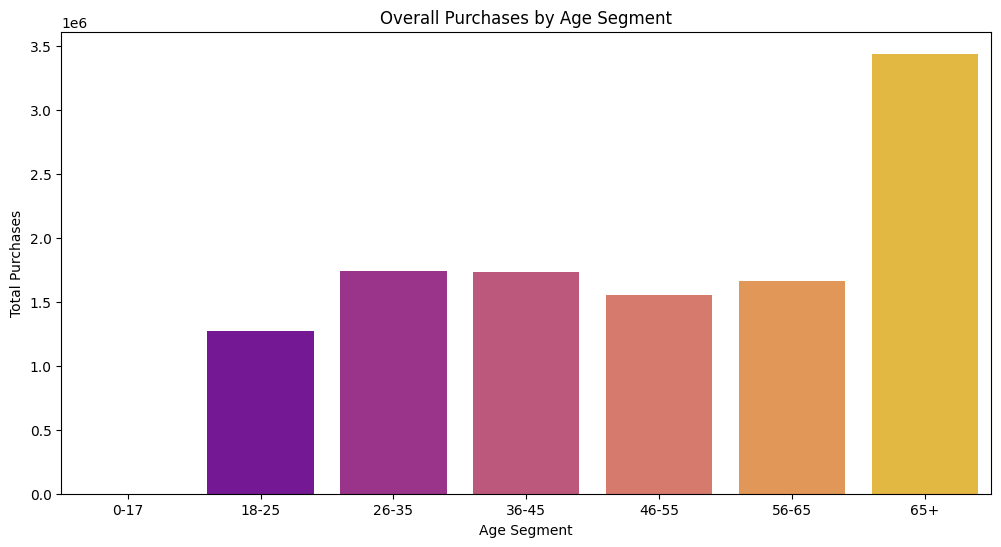

In [195]:

# Plot total purchases by age segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Segment', y='Total Price', data=age_segment_summary, palette='plasma')
plt.title('Overall Purchases by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Total Purchases')
plt.show()

<ipython-input-196-33afa1fba209>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




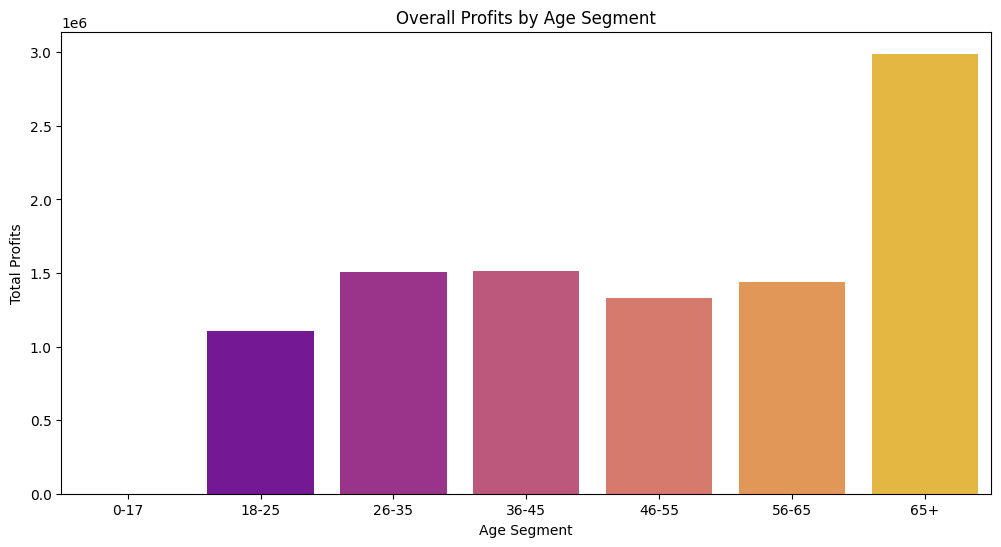

In [196]:
# Plot total profits by age segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Segment', y='Profit', data=age_segment_summary, palette='plasma')
plt.title('Overall Profits by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Total Profits')
plt.show()

<ipython-input-197-2c42bb9a536c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




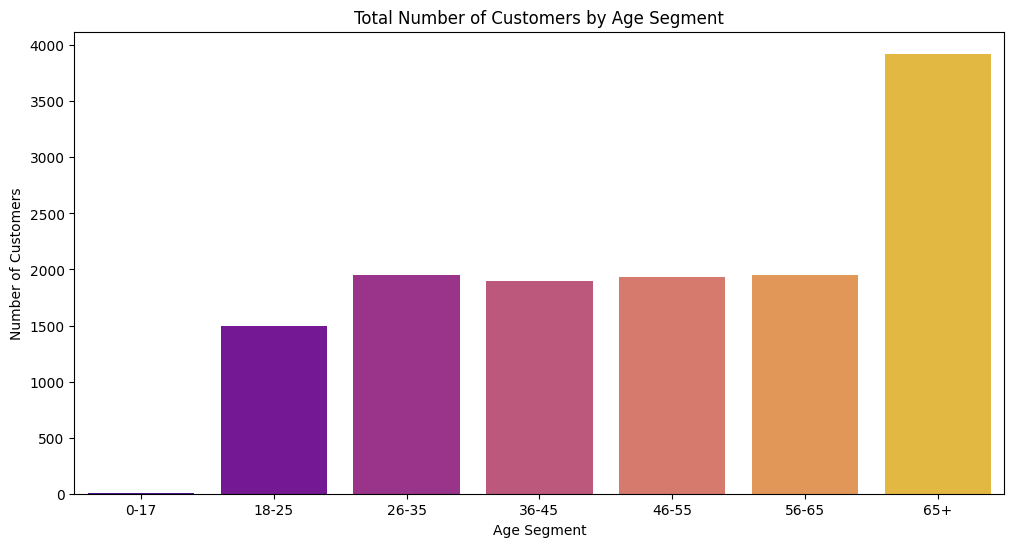

In [197]:
# Plot number of customers by age segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Segment', y='Number of Customers', data=age_segment_summary, palette='plasma')
plt.title('Total Number of Customers by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Number of Customers')
plt.show()

**Detailed Analysis:**

**1.Target Older Age Segments:**


Marketing and product strategies should prioritize the 65+ age segment, as they contribute the most to total purchases and profits. Tailoring products and services to meet their needs could further enhance profitability.

**2.Focus on Middle-Aged Customers:**

The 26-35, 36-45, and 46-55 age segments are also crucial for revenue. Maintaining and growing engagement with these segments through targeted promotions and loyalty programs can sustain and boost revenue.

**3. Opportunities with Younger Customers**:

The lower spending in the 18-25 segment suggests opportunities to create more affordable or appealing offerings for younger customers, potentially increasing their purchasing activity.
Balanced Strategy:



While focusing on high-spending age segments, a balanced strategy should also consider growing the customer base across all age segments to ensure diversified revenue streams.

**Behavioral Segmentation**


In [190]:
# Aggregate total purchases, profits, and number of customers by product category
category_summary = data_df.groupby('Category').agg({
    'Total Price': 'sum',
    'Profit': 'sum',
    'CustomerKey': 'nunique'  # Count the number of unique customers
}).rename(columns={'CustomerKey': 'Number of Customers'}).reset_index()
category_summary

,Category,Total Price,Profit,Number of Customers
0,Audio,664423,575572,1320
1,Cameras and camcorders,1251419,1089596,1002
2,Cell phones,1369833,1181566,1714
3,Computers,4084250,3548109,2134
4,Games and Toys,150045,127974,1228
5,Home Appliances,2113965,1831880,989
6,"Music, Movies and Audio Books",634690,553528,1500
7,TV and Video,1130286,977060,671


<ipython-input-191-830b4ef7604c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




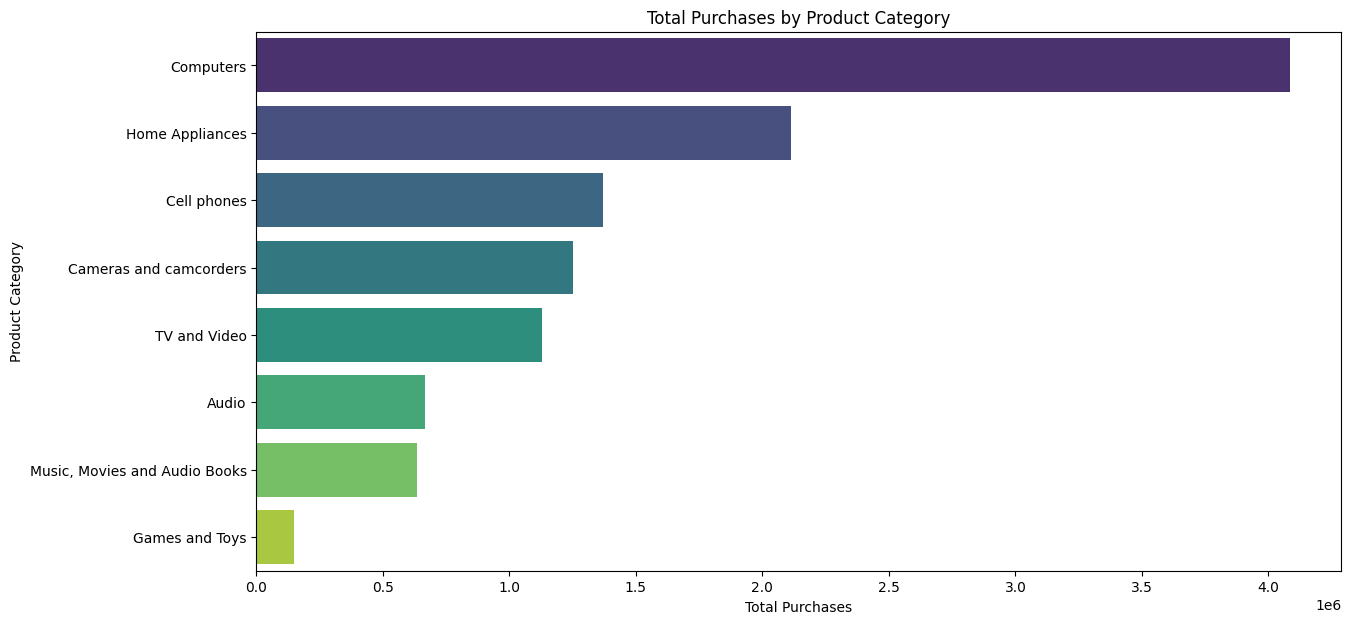

In [191]:
# Plot total purchases by product category
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Price', y='Category', data=category_summary.sort_values('Total Price', ascending=False), palette='viridis')
plt.title('Total Purchases by Product Category')
plt.xlabel('Total Purchases')
plt.ylabel('Product Category')
plt.show()

<ipython-input-192-560306d0ff23>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




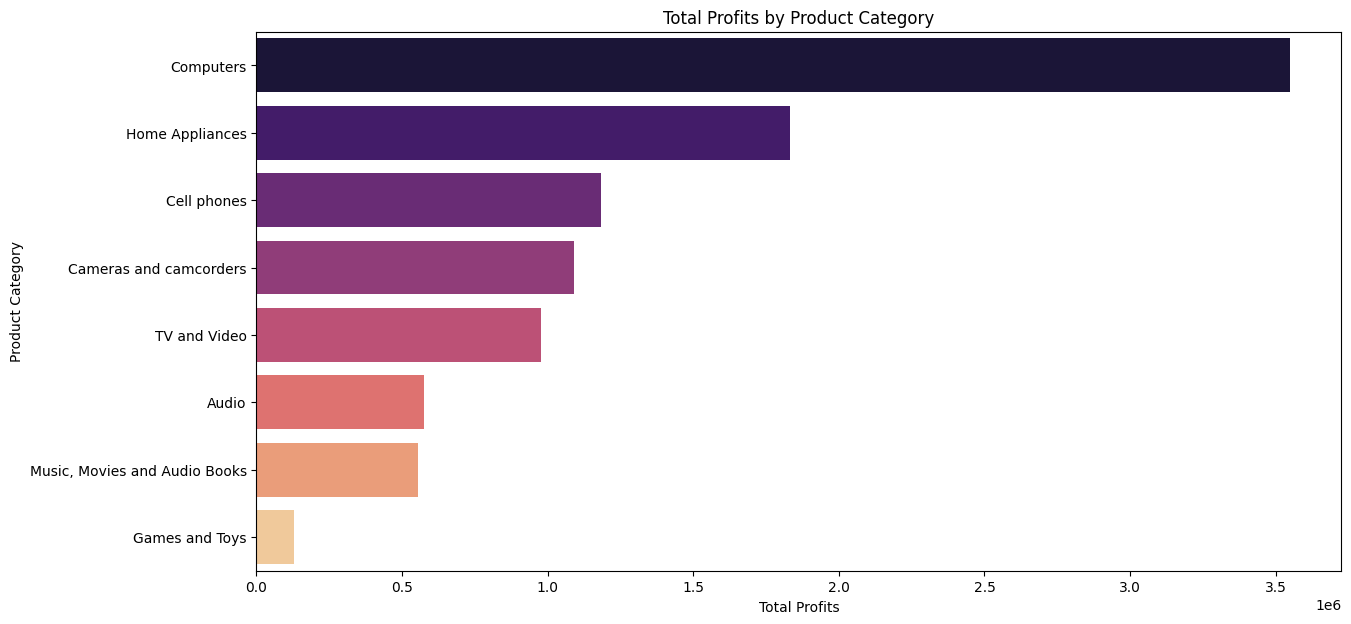

In [192]:
# Plot total profits by product category
plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='Category', data=category_summary.sort_values('Profit', ascending=False), palette='magma')
plt.title('Total Profits by Product Category')
plt.xlabel('Total Profits')
plt.ylabel('Product Category')
plt.show()


<ipython-input-193-560306d0ff23>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




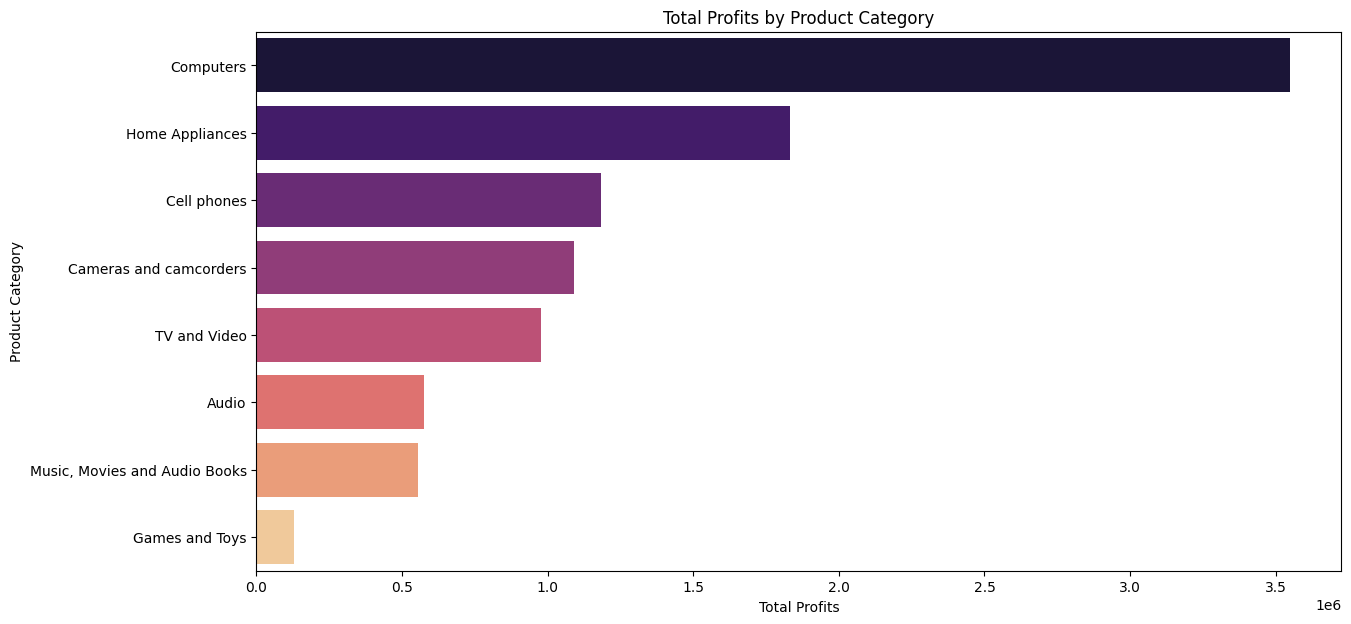

In [193]:
# Plot total profits by product category
plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='Category', data=category_summary.sort_values('Profit', ascending=False), palette='magma')
plt.title('Total Profits by Product Category')
plt.xlabel('Total Profits')
plt.ylabel('Product Category')
plt.show()

<ipython-input-194-d7bf659f6bc6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




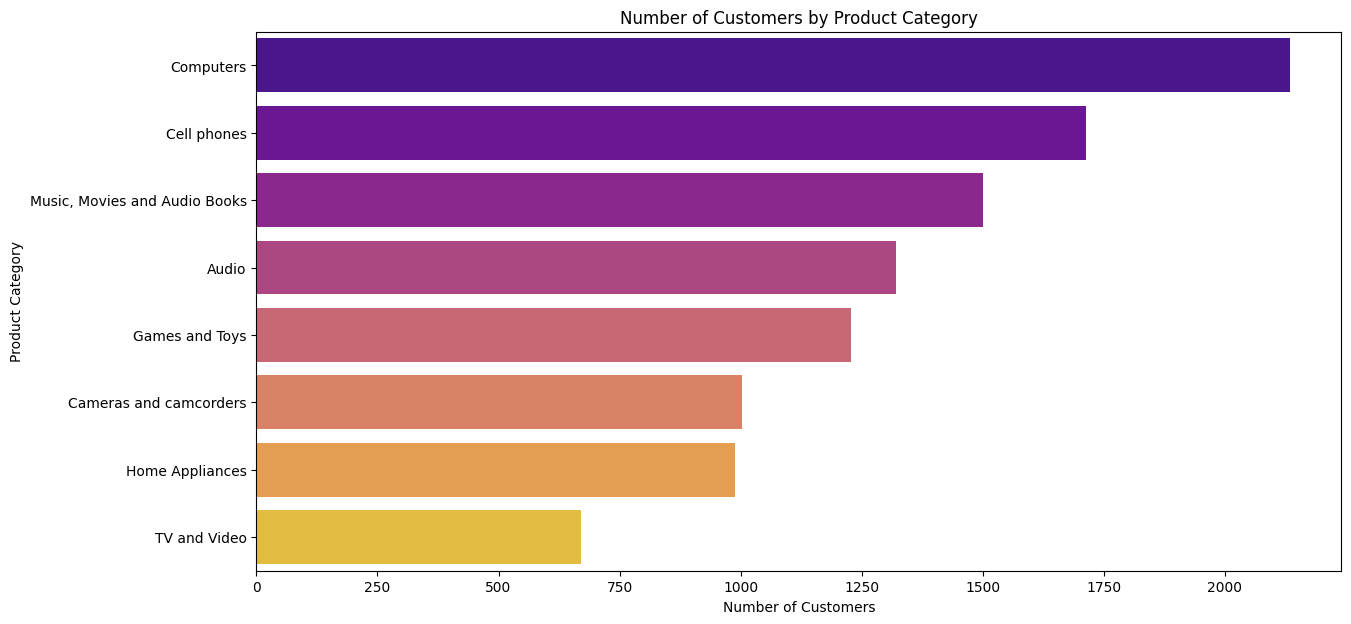

In [194]:
# Plot number of customers by product category
plt.figure(figsize=(14, 7))
sns.barplot(x='Number of Customers', y='Category', data=category_summary.sort_values('Number of Customers', ascending=False), palette='plasma')
plt.title('Number of Customers by Product Category')
plt.xlabel('Number of Customers')
plt.ylabel('Product Category')
plt.show()

**Detailed Analysis:**

**1. Market Dominance of Computers:**

* The Computers category dominates in all three metrics: total purchases, profits, and number of customers.
* This indicates a strong market presence and suggests that further investment in this category could yield high returns.

**2.Strong Performance of Home Appliances and Cell Phones:**

* Both Home Appliances and Cell Phones are significant contributors to revenue and profit.
* These categories have a substantial customer base, indicating strong demand and engagement.

**3.Potential Growth for Lower Performing Categories:**

* Categories like Games and Toys and Music, Movies, and Audio Books have lower total purchases and profits.
* Despite their lower revenue, these categories have a considerable number of customers, suggesting potential for growth through targeted marketing and product enhancements.

**4. Niche Markets:**

* TV and Video and Home Appliances have fewer customers but relatively high total purchases and profits, indicating they cater to a niche market that is willing to spend more.

In [208]:
# Aggregate total purchases, profits, and number of customers by product name
product_summary = data_df.groupby('Product Name').agg({
    'Total Price': 'sum',
    'Profit': 'sum',
    'CustomerKey': 'nunique'  # Count the number of unique customers
}).rename(columns={'CustomerKey': 'Number of Customers'}).reset_index()
print(product_summary)
# Aggregate total purchases, profits, and number of customers by brand
brand_summary = data_df.groupby('Brand').agg({
    'Total Price': 'sum',
    'Profit': 'sum',
    'CustomerKey': 'nunique'  # Count the number of unique customers
}).rename(columns={'CustomerKey': 'Number of Customers'}).reset_index()
print(brand_summary)



                                           Product Name  Total Price  Profit  \
0           A. Datum Advanced Digital Camera M300 Azure          754     580   
1           A. Datum Advanced Digital Camera M300 Black          754     667   
2           A. Datum Advanced Digital Camera M300 Green          565     391   
3            A. Datum Advanced Digital Camera M300 Grey         1883    1535   
4          A. Datum Advanced Digital Camera M300 Orange         1883    1535   
...                                                 ...          ...     ...   
2181  WWI Wireless Transmitter and Bluetooth Headpho...        15481   13904   
2182  WWI Wireless Transmitter and Bluetooth Headpho...        16229   14486   
2183  WWI Wireless Transmitter and Bluetooth Headpho...         9737    8658   
2184  WWI Wireless Transmitter and Bluetooth Headpho...        13732   12238   
2185  WWI Wireless Transmitter and Bluetooth Headpho...        14234   12906   

      Number of Customers  
0          

<ipython-input-203-d2409346ca05>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




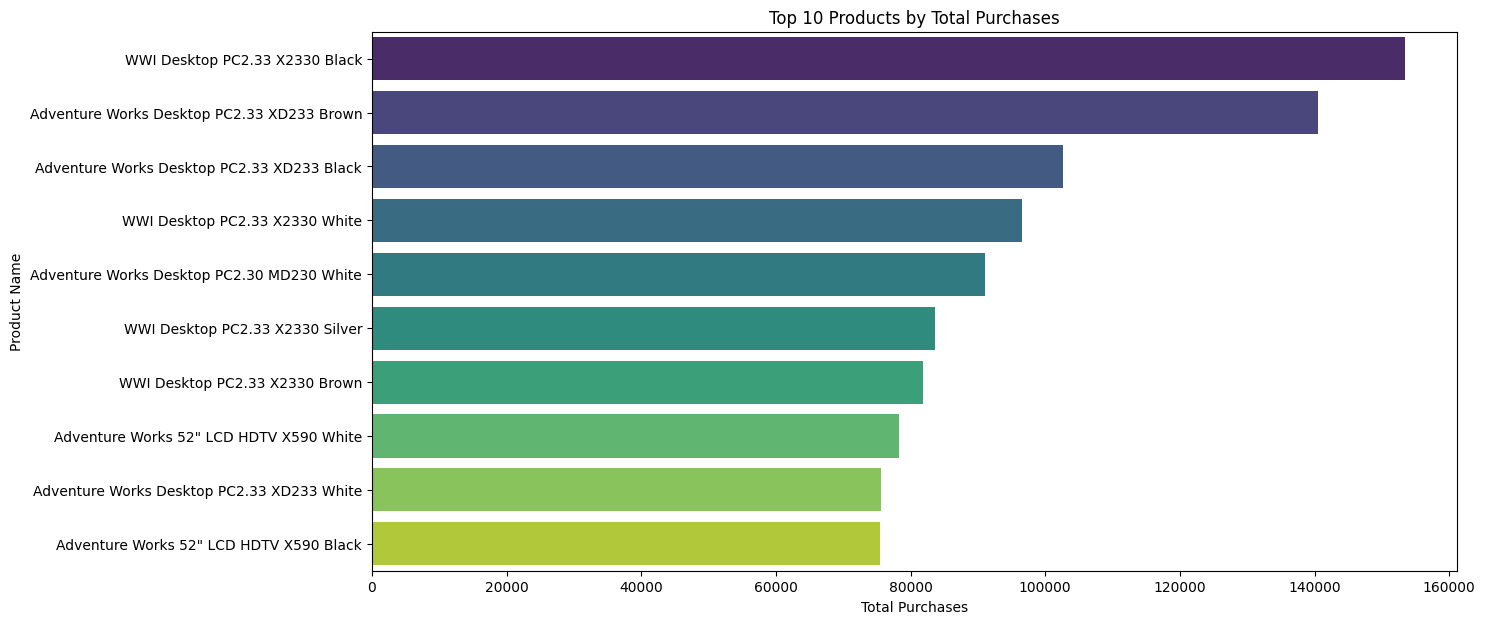

In [203]:
# Plot total purchases by product name (top 10)
plt.figure(figsize=(14, 7))
top_products = product_summary.sort_values('Total Price', ascending=False).head(10)
sns.barplot(x='Total Price', y='Product Name', data=top_products, palette='viridis')
plt.title('Top 10 Products by Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Product Name')
plt.show()






<ipython-input-202-125efa060b02>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




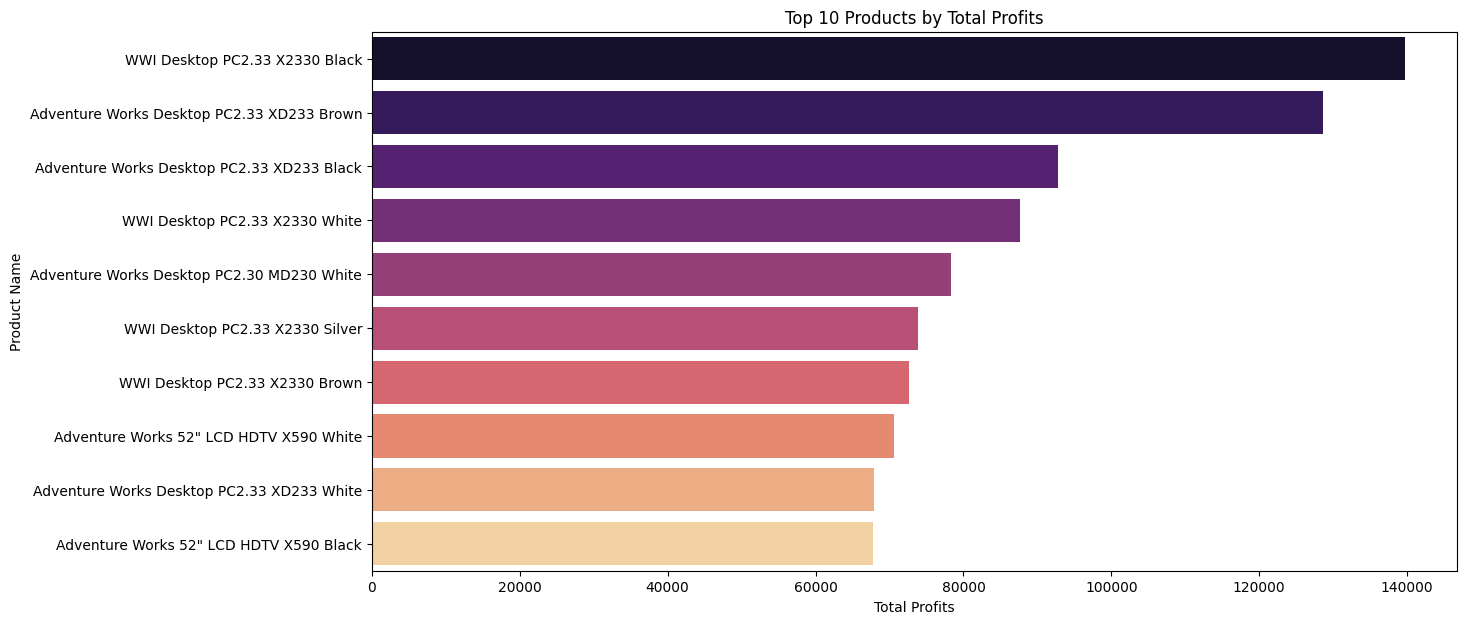

In [202]:
# Plot total profits by product name (top 10)
plt.figure(figsize=(14, 7))
top_products = product_summary.sort_values('Profit', ascending=False).head(10)
sns.barplot(x='Profit', y='Product Name', data=top_products, palette='magma')
plt.title('Top 10 Products by Total Profits')
plt.xlabel('Total Profits')
plt.ylabel('Product Name')
plt.show()

<ipython-input-204-a533a4f2e7db>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




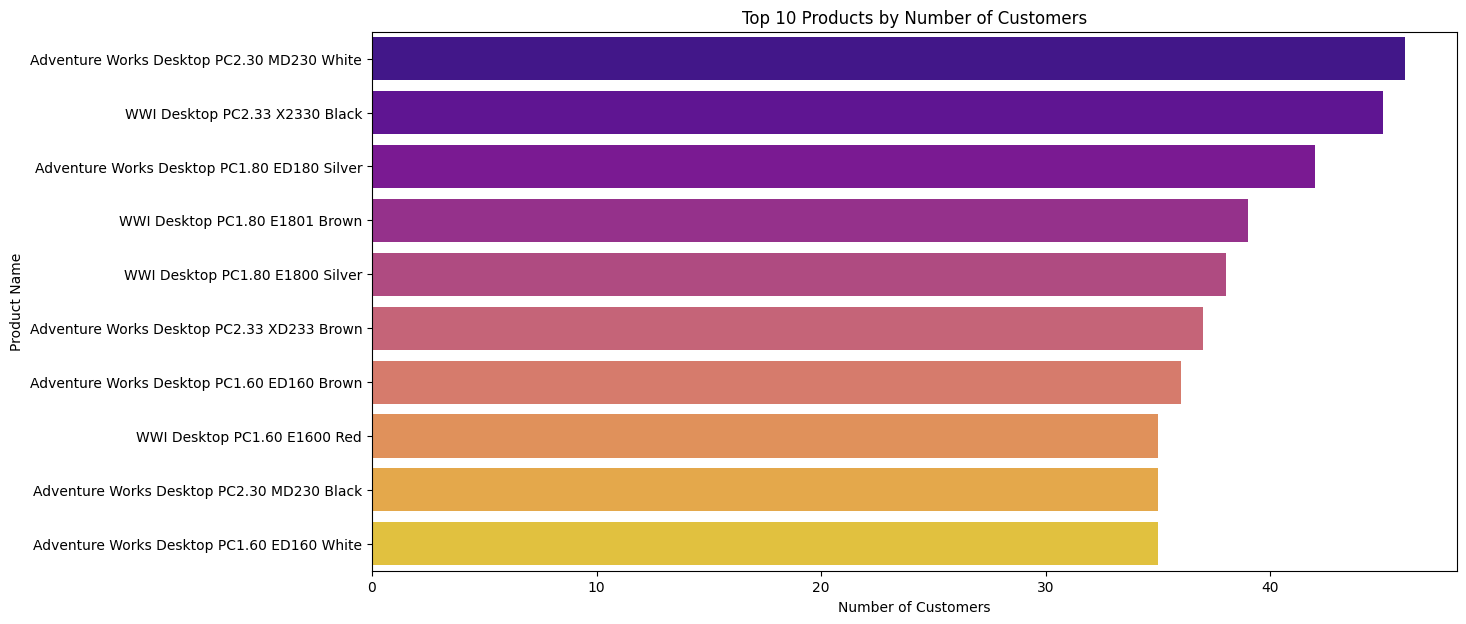

In [204]:
# Plot number of customers by product name (top 10)
plt.figure(figsize=(14, 7))
top_products = product_summary.sort_values('Number of Customers', ascending=False).head(10)
sns.barplot(x='Number of Customers', y='Product Name', data=top_products, palette='plasma')
plt.title('Top 10 Products by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Product Name')
plt.show()

<ipython-input-209-de3d5cdf09b6>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




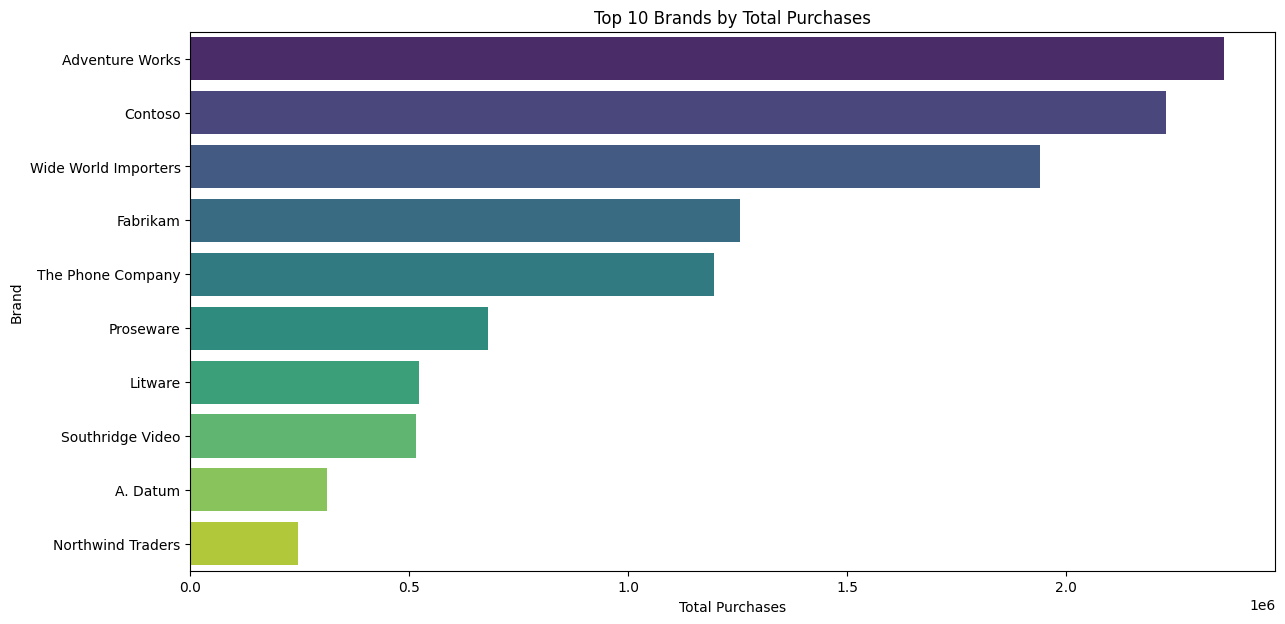

In [209]:
# Plot total purchases by brand (top 10)
plt.figure(figsize=(14, 7))
top_brands = brand_summary.sort_values('Total Price', ascending=False).head(10)
sns.barplot(x='Total Price', y='Brand', data=top_brands, palette='viridis')
plt.title('Top 10 Brands by Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Brand')
plt.show()





<ipython-input-210-e34bec0cb73f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




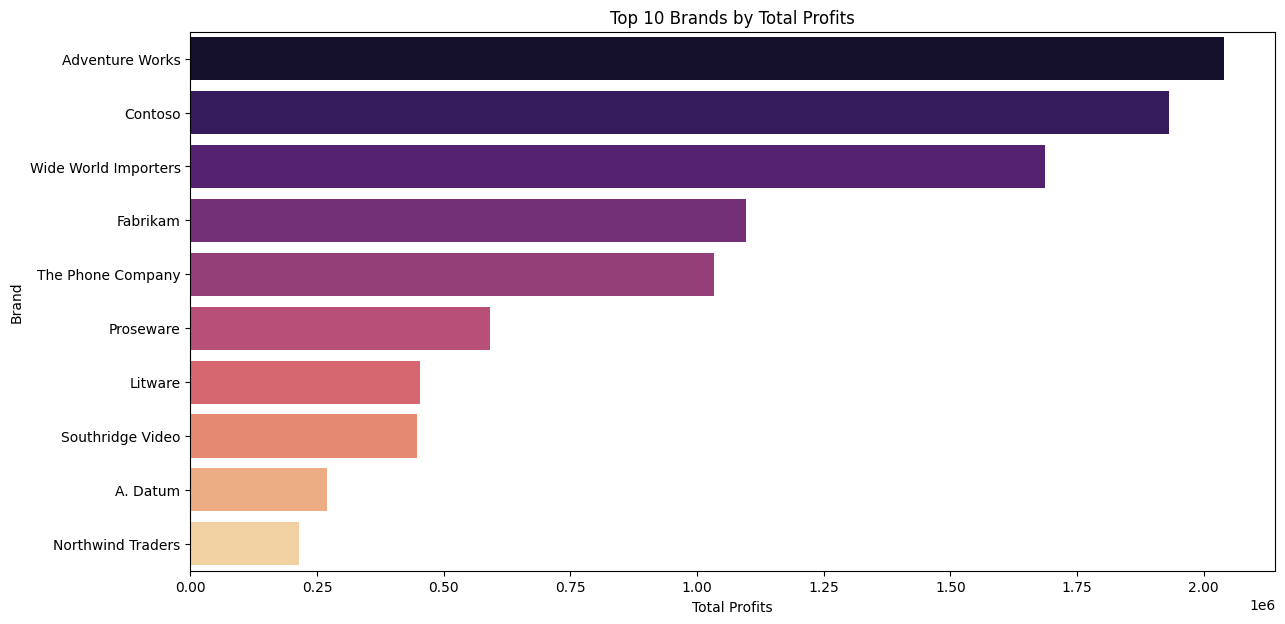

In [210]:
# Plot total profits by brand (top 10)
plt.figure(figsize=(14, 7))
top_brands = brand_summary.sort_values('Profit', ascending=False).head(10)
sns.barplot(x='Profit', y='Brand', data=top_brands, palette='magma')
plt.title('Top 10 Brands by Total Profits')
plt.xlabel('Total Profits')
plt.ylabel('Brand')
plt.show()


<ipython-input-211-013f90e01e25>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




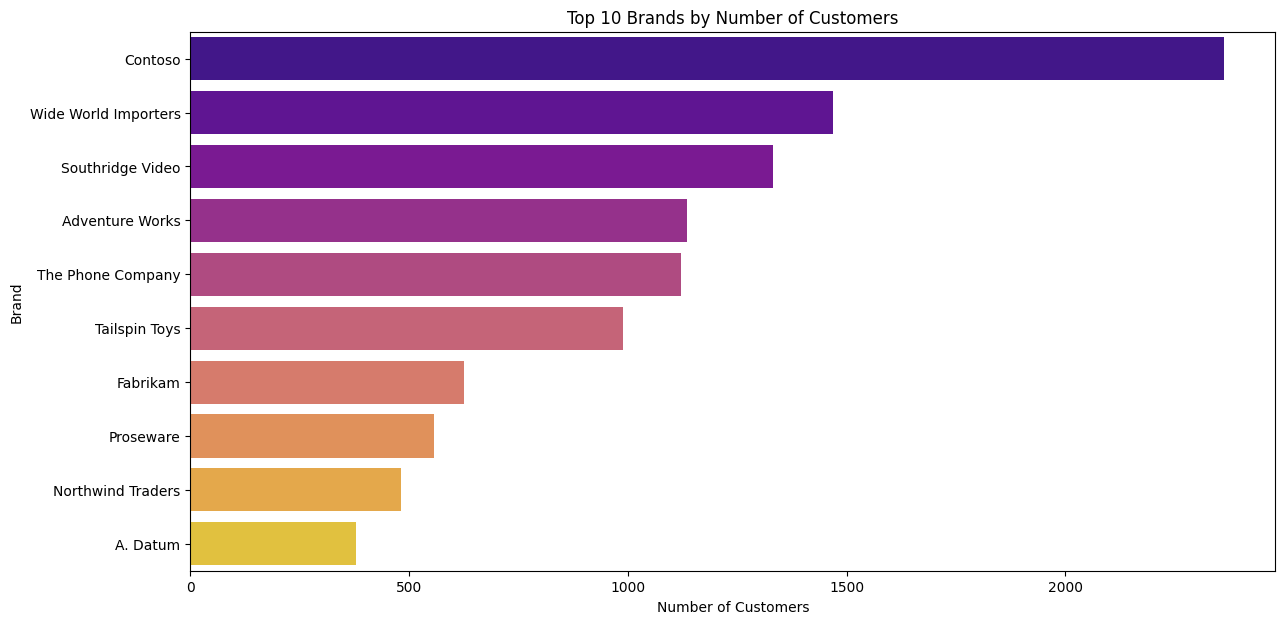

In [211]:
# Plot number of customers by brand (top 10)
plt.figure(figsize=(14, 7))
top_brands = brand_summary.sort_values('Number of Customers', ascending=False).head(10)
sns.barplot(x='Number of Customers', y='Brand', data=top_brands, palette='plasma')
plt.title('Top 10 Brands by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Brand')
plt.show()

**Detailed Analysis:**
we have already analyzed customer behavior, and it shows that computer parts generate the most sales and profit. Among the top 10 products, desktop computers consistently rank high.

# **3. Engagement Analysis:**

**Customer Loyalty Metric and Analysis**
**Customer Loyalty Metric:**

To quantify customer loyalty, we can devise a metric called Customer Loyalty Score (CLS). This metric will take into account the frequency of repeat purchases, the recency of the last purchase, and the monetary value of purchases. One common approach is the RFM Analysis (Recency, Frequency, Monetary):

* Recency (R): The time since the customer's last purchase.

* Frequency (F): The total number of purchases made by the customer.
* Monetary Value (M): The total amount spent by the customer.

In [213]:
data_df.head()

,Order Date,CustomerKey,Gender,City,State Code,State,Zip Code,Country,Continent,Customer_Age,Quantity,Total Price,Profit,Product Name,Brand,Category,Subcategory,CategoryKey,Age Segment
0,2016-01-01,1269051,Male,Auberry,CA,California,93602,United States,North America,25,2,854,712,A. Datum SLR Camera X136 Silver,A. Datum,Cameras and camcorders,Digital SLR Cameras,4,18-25
1,2016-01-01,1269051,Male,Auberry,CA,California,93602,United States,North America,25,1,665,444,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Home Appliances,Microwaves,8,18-25
2,2016-01-01,266019,Female,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,58,7,2254,2105,Contoso SLR Camera M146 Orange,Contoso,Cameras and camcorders,Digital SLR Cameras,4,56-65
3,2016-01-01,266019,Female,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,58,1,326,159,Adventure Works Laptop8.9 E0890 White,Adventure Works,Computers,Laptops,3,56-65
4,2016-01-01,266019,Female,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,58,4,2584,2369,Contoso SLR Camera X143 Silver,Contoso,Cameras and camcorders,Digital SLR Cameras,4,56-65


In [222]:
# Reference date for recency calculation
today_date = min_order_date

# Calculate Recency, Frequency, and Monetary value for each customer
rfm_df = data_df.groupby('CustomerKey').agg({
    'Order Date': lambda x: (x.max() - today_date).days,
    'Customer_Age': 'size',
    'Total Price': 'sum'
}).reset_index()
# Rename columns
rfm_df.columns = ['CustomerKey', 'Recency', 'Frequency', 'Monetary']

rfm_df.head()

,CustomerKey,Recency,Frequency,Monetary
0,301,1410,1,592
1,325,1464,5,897
2,554,734,1,357
3,1568,1867,4,728
4,2435,284,2,1526


In [223]:
# Assign scores to RFM components
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=range(5, 0, -1))
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=range(1, 6))
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=range(1, 6))

# Calculate Customer Loyalty Score (CLS)
rfm_df['CLS'] = (rfm_df['R_score'].astype(int) + rfm_df['F_score'].astype(int) + rfm_df['M_score'].astype(int)) / 3

# Display the RFM dataframe
rfm_df.head()


,CustomerKey,Recency,Frequency,Monetary,R_score,F_score,M_score,CLS
0,301,1410,1,592,2,1,2,1.666667
1,325,1464,5,897,2,5,2,3.000000
2,554,734,1,357,5,1,1,2.333333
3,1568,1867,4,728,1,4,2,2.333333
4,2435,284,2,1526,5,2,3,3.333333


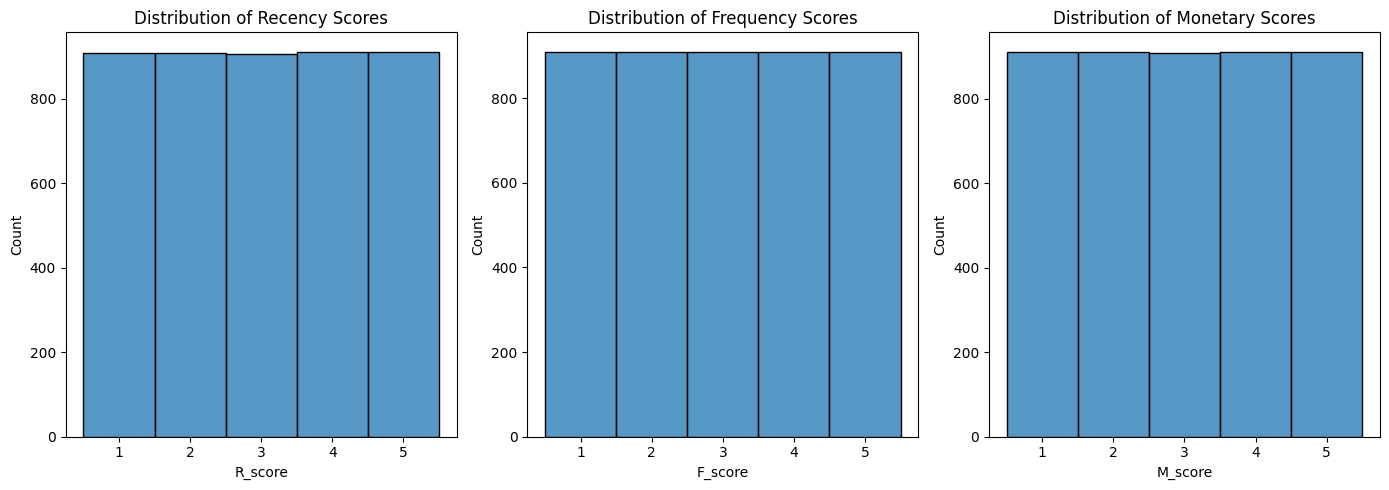

In [224]:
# Plot distribution of Recency, Frequency, and Monetary scores
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['R_score'], kde=False, bins=5)
plt.title('Distribution of Recency Scores')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['F_score'], kde=False, bins=5)
plt.title('Distribution of Frequency Scores')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['M_score'], kde=False, bins=5)
plt.title('Distribution of Monetary Scores')

plt.tight_layout()
plt.show()

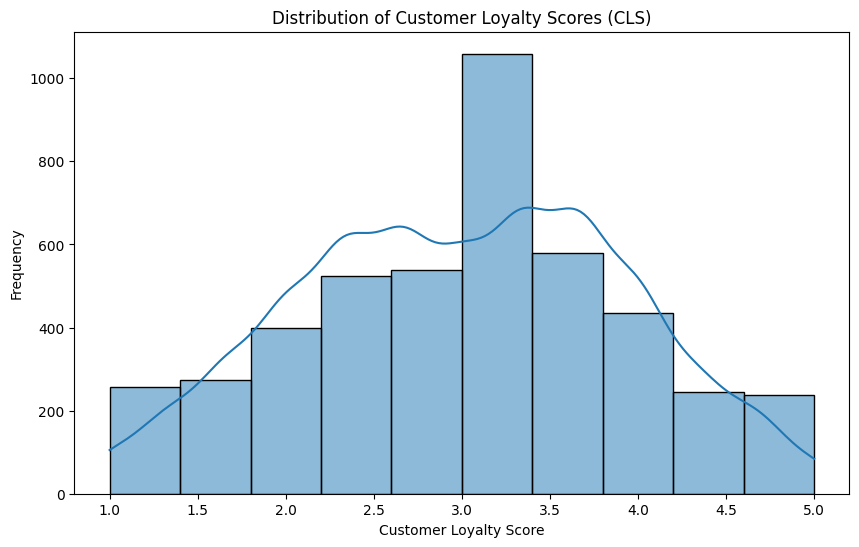

In [226]:
# Plot distribution of Customer Loyalty Scores (CLS)
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['CLS'], kde=True, bins=10)
plt.title('Distribution of Customer Loyalty Scores (CLS)')
plt.xlabel('Customer Loyalty Score')
plt.ylabel('Frequency')
plt.show()


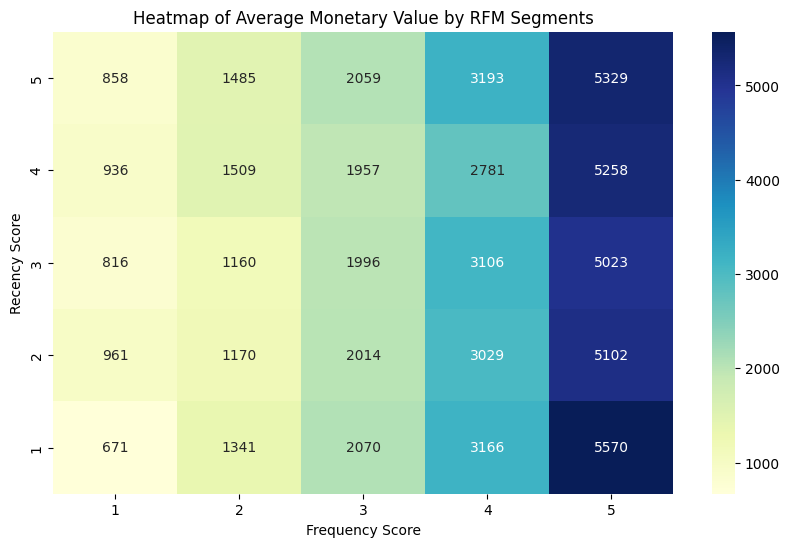

In [228]:
# Create RFM segments
rfm_df['RFM_Segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Pivot table for heatmap
rfm_pivot = rfm_df.pivot_table(index='R_score', columns='F_score', values='Monetary', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Average Monetary Value by RFM Segments')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()



**Detailed Analysis:**

**1. High-Value Customers:**

* Focus on retaining customers with high recency and frequency scores. These customers are the most valuable, and retaining them through targeted marketing and loyalty programs could further boost revenue.
* Consider personalized offers and incentives to keep these customers engaged.

**2.Moderate-Value Customers:**

* Develop strategies to move moderate-value customers (mid-level recency and frequency scores) up the value chain. Encouraging more frequent purchases and increasing engagement could help convert these customers into high-value segments.
* Implement targeted marketing campaigns to increase their purchase frequency and recency.

**3. Low-Value Customers:**

* Identify reasons for low engagement among low-value customers. This could involve understanding barriers to purchase, improving product offerings, or enhancing customer service.
* Re-engagement campaigns, such as win-back offers or personalized communication, could help revive interest and increase their purchase activity.

**Hypothesis Testing**
**Formulate Hypothesis**


*   Null Hypothesis (H0): There is no significant difference in average total purchases between male and female customers.
*   Alternative Hypothesis (H1): There is a significant difference in average total purchases between male and female customers.



In [237]:
from scipy import stats

# Extract purchase data for each demographic group
male_purchases = data_df[data_df['Gender'] == 'Male']['Total Price']
female_purchases = data_df[data_df['Gender'] == 'Female']['Total Price']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_purchases, female_purchases)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 1.3587112466852334, P-Value: 0.17426138876178218


**Conclusion:**
Since the P-Value (0.1743) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that there is a significant difference in average total purchases between male and female customers.

# **Solution for Problem Statemment and Recommendations**

In [238]:
# Analyze monthly/quarterly trends
data_df['Order Month'] = data_df['Order Date'].dt.to_period('M').astype(str)
data_df['Order Year'] = data_df['Order Date'].dt.to_period('Y').astype(str)

monthly_trends = data_df.groupby(['Order Year', 'Order Month']).agg({
    'Total Price': 'sum',
    'Order Date': 'count'
}).rename(columns={'Order Date': 'Number of Transactions'}).reset_index()

monthly_trends['Average Transaction Value'] = monthly_trends['Total Price'] / monthly_trends['Number of Transactions']

print(monthly_trends)






<ipython-input-238-b571db23ac62>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   Order Year Order Month  Total Price  Number of Transactions  \
0        2016     2016-01        68149                     108   
1        2016     2016-02        97902                     111   
2        2016     2016-03        22395                      27   
3        2016     2016-04        15892                      11   
4        2016     2016-05        52742                      64   
..        ...         ...          ...                     ...   
57       2020     2020-10        62015                      80   
58       2020     2020-11        45242                      76   
59       2020     2020-12       162552                     202   
60       2021     2021-01       151436                     169   
61       2021     2021-02       134204                     164   

    Average Transaction Value  
0                  631.009259  
1                  882.000000  
2                  829.444444  
3                 1444.727273  
4                  824.093750  
..             

<ipython-input-238-b571db23ac62>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



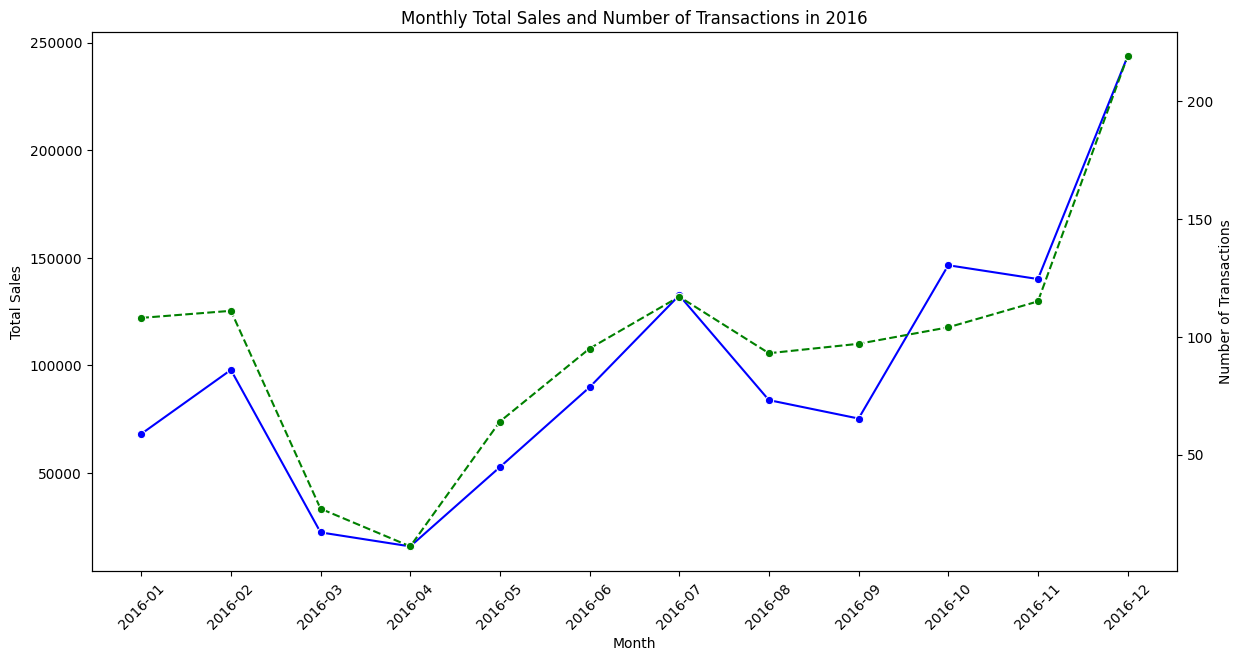

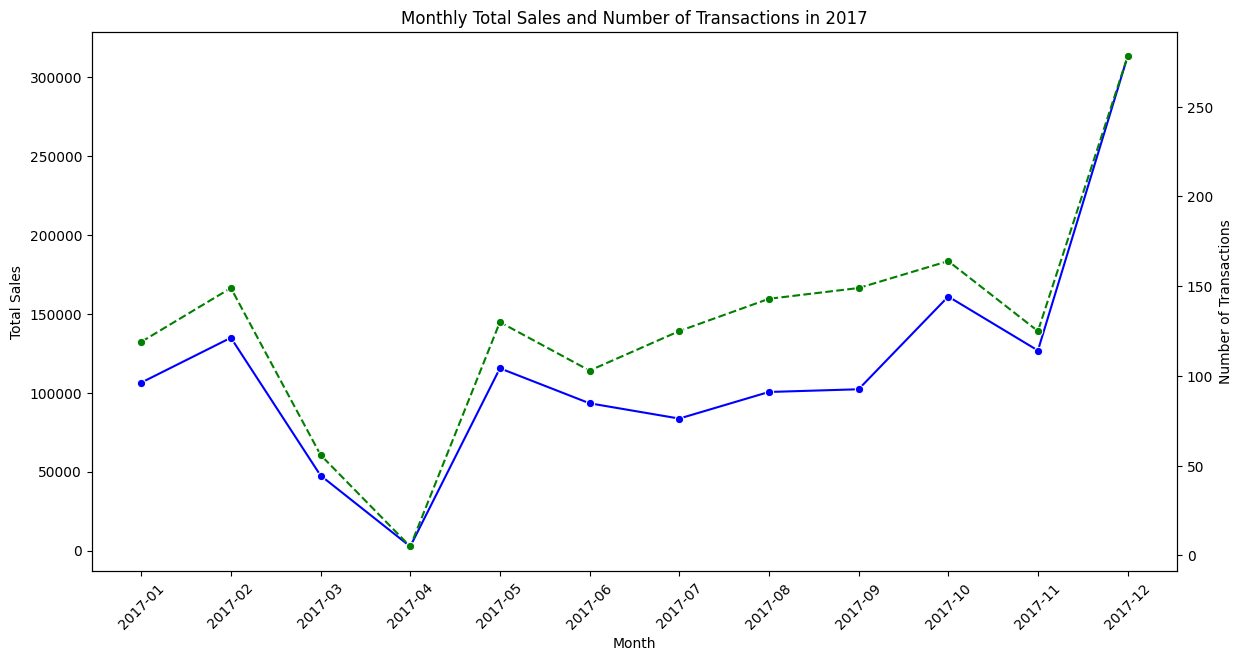

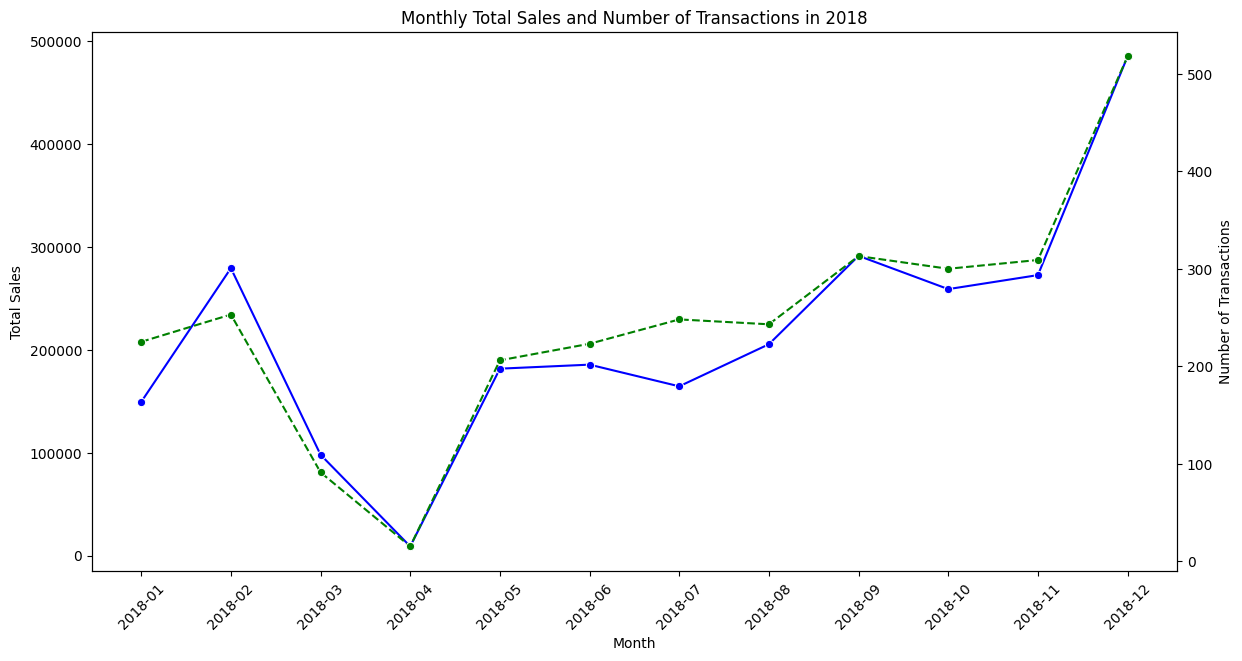

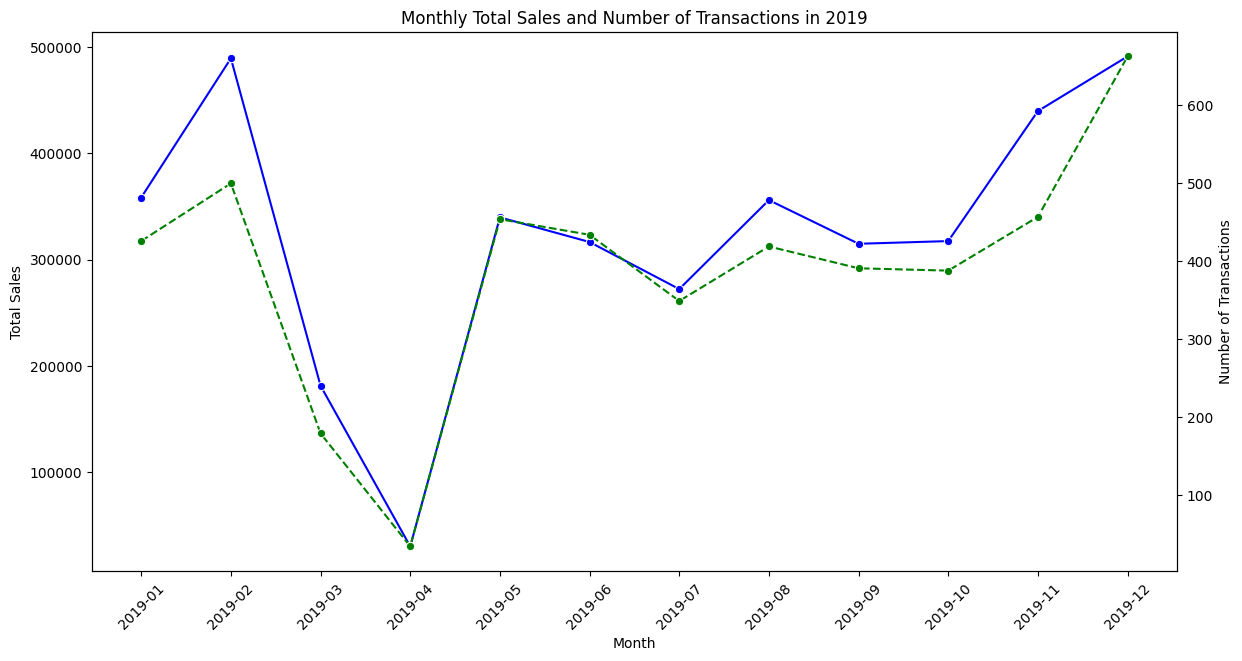

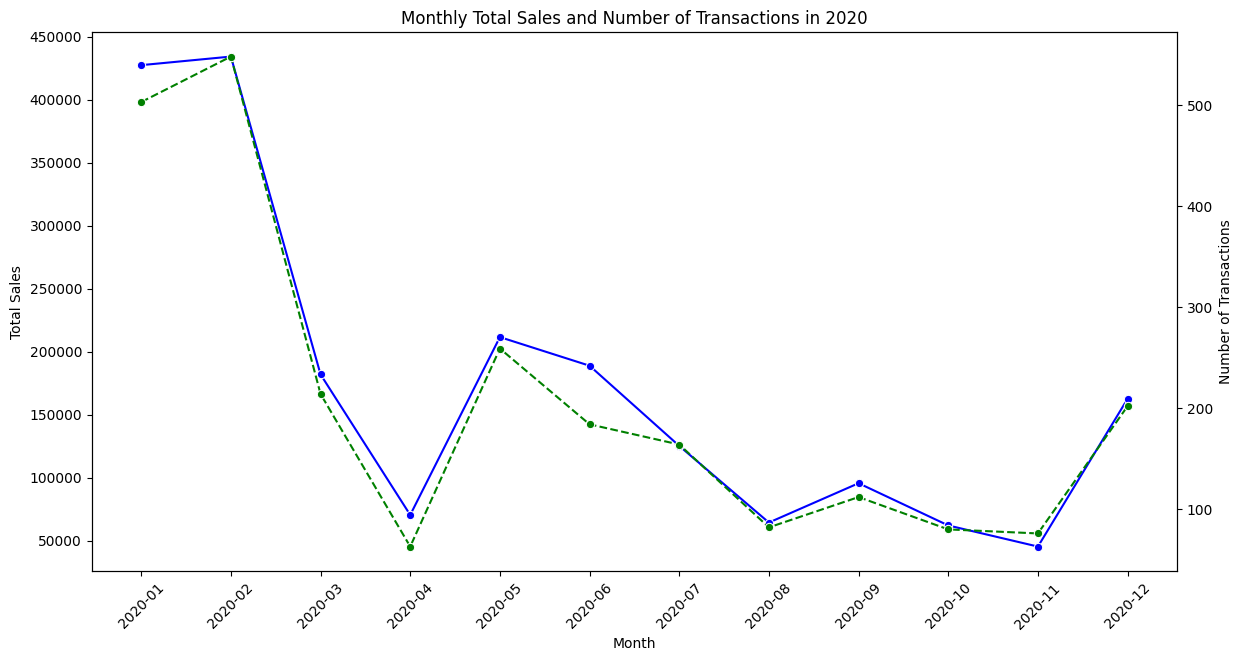

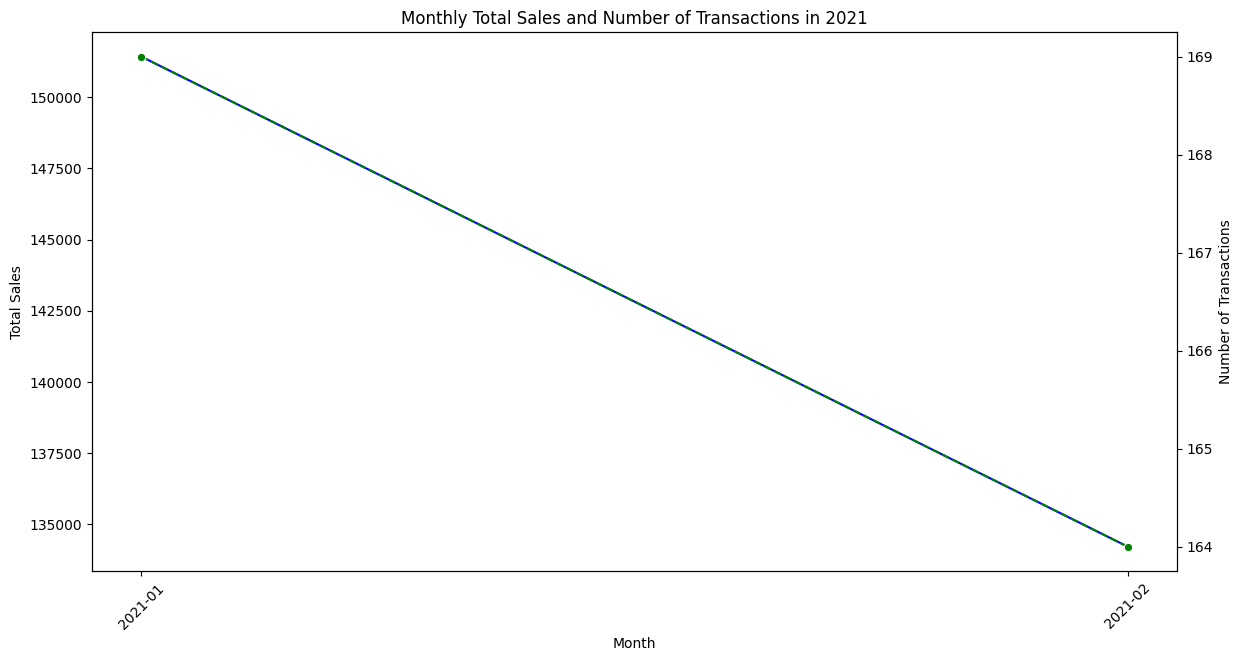

In [241]:
# Function to plot trends for a specific year
def plot_yearly_trends(year):
    yearly_data = monthly_trends[monthly_trends['Order Year'] == year]

    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot Total Sales on the first y-axis
    sns.lineplot(x='Order Month', y='Total Price', data=yearly_data, marker='o', ax=ax1, color='b')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Total Sales')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title(f'Monthly Total Sales and Number of Transactions in {year}')

    # Create a second y-axis to plot Number of Transactions
    ax2 = ax1.twinx()
    sns.lineplot(x='Order Month', y='Number of Transactions', data=yearly_data, marker='o', ax=ax2, color='g', linestyle='--')
    ax2.set_ylabel('Number of Transactions')

    plt.show()

# Plot trends for each year
years = monthly_trends['Order Year'].unique()
for year in years:
    plot_yearly_trends(year)

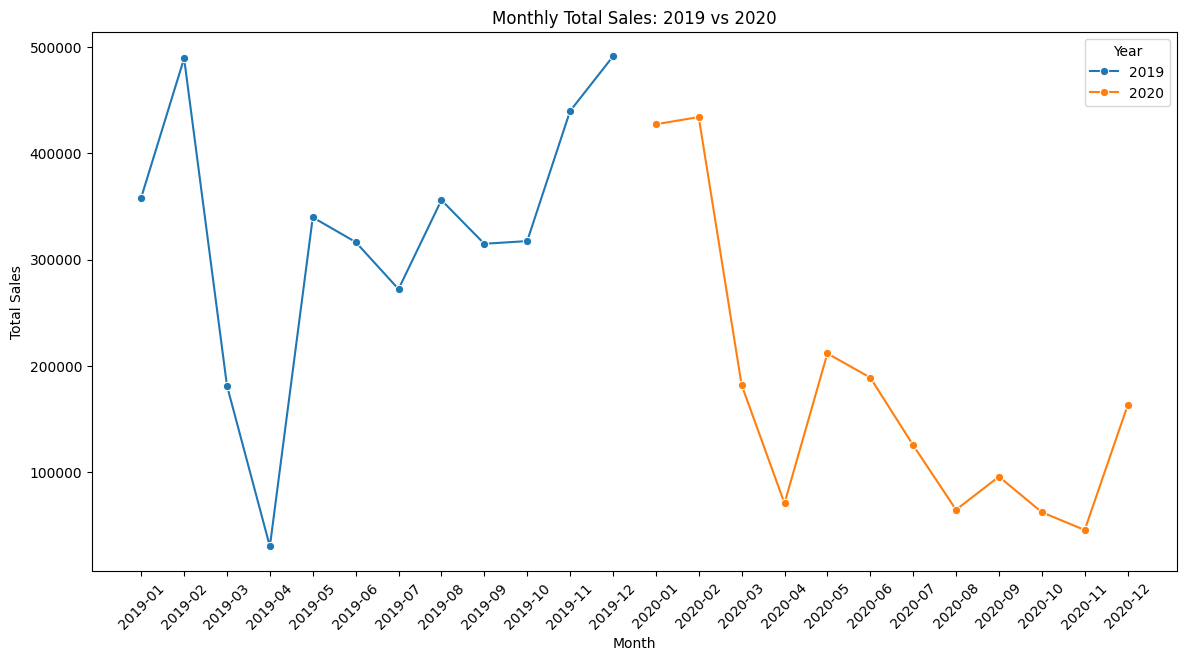

In [243]:
# Filter data for 2019 and 2020
monthly_trends_2019_2020 = monthly_trends[monthly_trends['Order Year'].isin(['2019', '2020'])]

# Plotting the comparison for 2019 and 2020
plt.figure(figsize=(14, 7))

# Plot Total Sales
sns.lineplot(x='Order Month', y='Total Price', hue='Order Year', data=monthly_trends_2019_2020, marker='o')
plt.title('Monthly Total Sales: 2019 vs 2020')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()



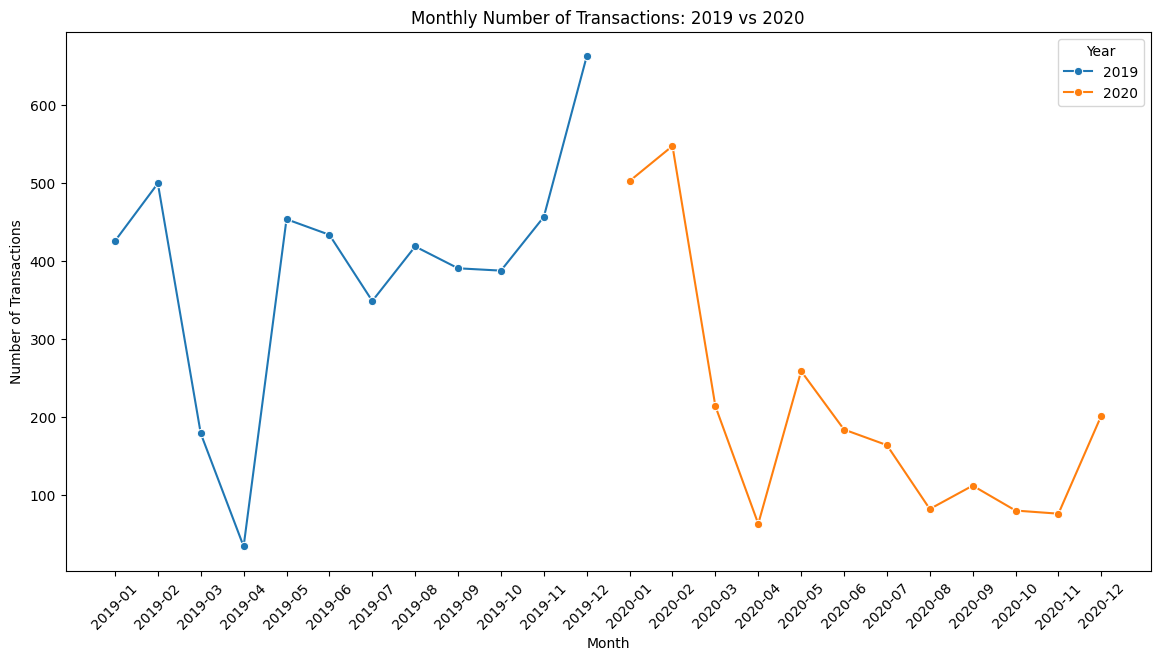

In [244]:
plt.figure(figsize=(14, 7))

# Plot Number of Transactions
sns.lineplot(x='Order Month', y='Number of Transactions', hue='Order Year', data=monthly_trends_2019_2020, marker='o')
plt.title('Monthly Number of Transactions: 2019 vs 2020')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

**Analysis of Monthly Total Sales and Number of Transactions: 2019 vs 2020 Monthly Total Sales**

**2019 Trends:**

* **High Sales Periods:** January, February, and November showed strong sales, with peaks around February and November.
* **Low Sales Periods**: March and April saw significant drops in sales, especially in April where it hit the lowest point of the year.
* **Recovery and Consistency:** After the dip in April, sales generally recovered and showed a more stable trend, with some fluctuations through the rest of the year.

**2020 Trends:**

* **Initial Performance:** January and February started with relatively strong sales, although not as high as the peaks in 2019.
* **Significant Decline:** There was a dramatic drop in sales in March and April, with sales hitting a low point similar to April 2019.
* **Partial Recovery:** There was a slight recovery in May and June, but sales generally remained lower compared to 2019.
* **Year-End Performance:** The year ended with a noticeable uptick in December, although it still did not reach the levels seen in late 2019.




**Key Insights**

**Impact of COVID-19:**

* The significant decline in both total sales and the number of transactions in March and April 2020 aligns with the onset of the COVID-19 pandemic, which likely caused disruptions in consumer behavior and spending.

**Inconsistent Recovery:**

* While there was some recovery in the middle of 2020, sales and transactions did not return to the levels seen in 2019. This suggests lingering effects of the pandemic, possible changes in consumer preferences, or economic challenges.

**Year-End Improvement:**

* Both metrics showed an improvement in December 2020, indicating a potential rebound in consumer spending towards the end of the year. This could be due to holiday season effects or partial economic recovery.

**Comparative Performance:**

* Overall, 2020 underperformed compared to 2019 in terms of both sales and transactions. The charts clearly highlight the stark differences in performance, especially during the pandemic's peak impact months.

**Recommendations**

**Targeted Marketing:**

* Implement targeted marketing campaigns to capitalize on the recovery seen at the end of 2020. Focus on customer segments that showed resilience or increased spending.

**Customer Retention Programs:**

* Develop loyalty programs and personalized offers to retain customers and encourage repeat purchases, especially targeting those who returned in December.

**Diversify Product Offerings:**

* Analyze product-level data to identify which products performed well during the downturn and consider expanding these categories or similar items.

**Enhanced Online Presence:**

* Strengthen online sales channels to capture market share from consumers who have shifted to online shopping during the pandemic.

**Seasonal Promotions:**

* Plan for seasonal promotions and discounts to boost sales during traditionally high-spending periods, leveraging the trends seen in November and December.


**By implementing these strategies, ScalerMart can work towards mitigating the impacts of the downturn and positioning itself for recovery and growth in the coming years.**

**Name :** Hariharan Murugan

**Batch:** DSML Sept23 Beginner

**Email:** haryharan.murugan@gmail.com